## What is EDA - Exploratory Data Analysis

>In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

Amazon is one of the leading e-commerce site today. Online shopping has become a trend now a days. But, before shopping online, people usually go to check reviews of consumers on that particular product. According to a research more than 85% of online shopping depends on reviews of the consumers. So, it is necessary to analyze the flaws in low sale of any product. That's why in this project, we am going to explore and analyze Amazon product reviews, that can be used in other similar projects too. Without talking much, let's move towards coding.

#### _Dataset for project consists of different files according to the category of products. Thus, we will perform analysis on them separately one by one_

### Importing all required libraries

In [88]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid")
get_ipython().run_line_magic('matplotlib', 'inline')

#### Generic Methods to Re-Arrange DataFrames

In [89]:
# Get the date when this category get the first review
def get_first_review_date(my_df):
    return my_df['date'].min()


# Get the date when this category get the last review
def get_last_review_date(my_df):
    return my_df['date'].max()


# As we have performed all kind of manipulations before. Thus we only need these changes here
def rearrange_columns(my_df):
    my_df['date'] = pd.to_datetime(df['date'], unit='s')
    my_df['rating'] = my_df['rating'].astype('int32')
    

# Function to create DataFrames for Plotting Graphs according to Dates
def rearrange_dates(df, df_2001=None, df_2002=None, df_2003=None, df_2004=None, df_2005=None, df_2006=None, df_2007=None, df_2008=None, df_2009=None, df_2010=None, df_2011=None, df_2012=None, df_2013=None, df_2014=None, df_2015=None, df_2016=None, df_2017=None, df_2018=None):
    # Rating according to Years
    df_2001 = df[df['date'] <= '2001-12-31']
    df_2002 = df[(df['date'] > '2001-12-31') & (df['date'] <= '2002-12-31')]
    df_2003 = df[(df['date'] > '2002-12-31') & (df['date'] <= '2003-12-31')]
    df_2004 = df[(df['date'] > '2003-12-31') & (df['date'] <= '2004-12-31')]
    df_2005 = df[(df['date'] > '2004-12-31') & (df['date'] <= '2005-12-31')]
    df_2006 = df[(df['date'] > '2005-12-31') & (df['date'] <= '2006-12-31')]
    df_2007 = df[(df['date'] > '2006-12-31') & (df['date'] <= '2007-12-31')]
    df_2008 = df[(df['date'] > '2007-12-31') & (df['date'] <= '2008-12-31')]
    df_2009 = df[(df['date'] > '2008-12-31') & (df['date'] <= '2009-12-31')]
    df_2010 = df[(df['date'] > '2009-12-31') & (df['date'] <= '2010-12-31')]
    df_2011 = df[(df['date'] > '2010-12-31') & (df['date'] <= '2011-12-31')]
    df_2012 = df[(df['date'] > '2011-12-31') & (df['date'] <= '2012-12-31')]
    df_2013 = df[(df['date'] > '2012-12-31') & (df['date'] <= '2013-12-31')]
    df_2014 = df[(df['date'] > '2013-12-31') & (df['date'] <= '2014-12-31')]
    df_2015 = df[(df['date'] > '2014-12-31') & (df['date'] <= '2015-12-31')]
    df_2016 = df[(df['date'] > '2015-12-31') & (df['date'] <= '2016-12-31')]
    df_2017 = df[(df['date'] > '2016-12-31') & (df['date'] <= '2017-12-31')]
    df_2018 = df[(df['date'] > '2017-12-31') & (df['date'] <= '2018-12-31')]
    
    return df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018


# Function to create Date Points, and Rating Lists for Graphs
# And to get only valid dates from DataFrames
def getting_years_five_one_ratings():
    
    df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018 = rearrange_dates(df)
    
    dfs_1_18 = [df_2001['rating'], df_2002['rating'], df_2003['rating'], df_2004['rating'], df_2005['rating'], df_2006['rating'], df_2007['rating'], df_2008['rating'], df_2009['rating'], df_2010['rating'], df_2011['rating'], df_2012['rating'], df_2013['rating'], df_2014['rating'], df_2015['rating'], df_2016['rating'], df_2017['rating'], df_2018['rating']]
    
#     print(dfs_1_18[-4].value_counts().sort_index())
    df_list_1_18 = [list(x.value_counts().sort_index()) for x in dfs_1_18]

    df_list_five_1_18_final = [x[-1] for x in df_list_1_18 if len(x)!=0]

    df_list_one_1_18_final = [x[0] for x in df_list_1_18 if len(x)!=0]
    
    dfs_years = [x for x in range(2018, 2000, -1)]
    dfs_years = sorted(dfs_years[:len(df_list_five_1_18_final)])
    
    return dfs_years, df_list_five_1_18_final, df_list_one_1_18_final


def getting_years_avg_ratings():    
    df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018 = rearrange_dates(df)
    dfs_1_18 = [df_2001['rating'], df_2002['rating'], df_2003['rating'], df_2004['rating'], df_2005['rating'], df_2006['rating'], df_2007['rating'], df_2008['rating'], df_2009['rating'], df_2010['rating'], df_2011['rating'], df_2012['rating'], df_2013['rating'], df_2014['rating'], df_2015['rating'], df_2016['rating'], df_2017['rating'], df_2018['rating']]
    dfs_1_18_avg_rating = [x_df.mean() for x_df in dfs_1_18 if len(x_df)!=0]
    dfs_years = [x for x in range(2018, 2000, -1)]
    dfs_years = sorted(dfs_years[:len(dfs_1_18_avg_rating)])   
    return dfs_years, dfs_1_18_avg_rating

#### Generic Methods for Plotting Graphs

In [90]:
def five_star_rating_graph():
    dfs_years, df_list_five_1_18_final, df_list_one_1_18_final = getting_years_five_one_ratings()
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set(xlabel="Years", ylabel="Number of ratings", title="Five Star (Best) Rating Tracking")
    plt.xticks(dfs_years) # Or you can also pass (rotation=90) parameter if your xtick_labels are long
    plt.plot(dfs_years, df_list_five_1_18_final, color='#6f00ff');
    
    
def one_star_rating_graph():
    dfs_years, df_list_five_1_18_final, df_list_one_1_18_final = getting_years_five_one_ratings()
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set(xlabel="Years", ylabel="Number of ratings", title="One Star (Worst) Rating Tracking")
    plt.xticks(dfs_years) # Or you can also pass (rotation=90) parameter if your xtick_labels are long
    plt.plot(dfs_years, df_list_one_1_18_final, color='#6f00ff');
    
    
def avg_rating_graph():
    dfs_years, dfs_1_18_avg_rating = getting_years_avg_ratings()
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set(xlabel="Years", ylabel="Average Rating", title="Average Rating Tracking")
    plt.xticks(dfs_years) # Or you can also pass (rotation=90) parameter if your xtick_labels are long
    plt.plot(dfs_years, dfs_1_18_avg_rating, color='#6f00ff');
    

def best_worst_rating_comparison():
    dfs_years, df_list_five_1_18_final, df_list_one_1_18_final = getting_years_five_one_ratings()
    
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set(xlabel="Years", ylabel="Average Rating", title="Best - Worst Comparison")
    plt.xticks(dfs_years) # Or you can also pass (rotation=90) parameter if your xtick_labels are long
    
    plt.plot(dfs_years, df_list_five_1_18_final, label = "Five Star")
    plt.plot(dfs_years, df_list_one_1_18_final, label = "One Star")
    
#     plt.title("Best - Worst Comparison")
#     plt.xlabel("Years")
#     plt.ylabel("Average Rating")
    plt.legend()
    plt.show()
#     fig, ax = plt.subplots(figsize=(14, 7))
#     ax.set(xlabel="Years", ylabel="Average Rating", title="Average Rating Tracking")
#     plt.xticks(dfs_years) # Or you can also pass (rotation=90) parameter if your xtick_labels are long
#     plt.plot(dfs_years, dfs_1_18_avg_rating, color='#6f00ff');
    
#     plt.plot(dfs_years, dfs_1_18_avg_rating, figsize=(14,7), label = "line 1")
#     plt.title("Average Rating Tracking")
#     plt.xlabel("Years")
#     plt.ylabel("Average Rating")
#     plt.show()
    

def rating_boxplot(df):
#     sns.boxplot(data=df['rating'], orient="h", palette="Set2", showmeans=True, meanline=True)
#     color = dict(boxes='black', whiskers='blue', medians='red', caps='black')
#     styles=dict(whiskers='--')
#     df['rating'].plot.box(color=color, style=styles)
    sns.boxplot(x="rating", data=df, whis=5, color='None', showmeans=True, meanline=True);
    
    
def rating_violinplot(df):
    sns.violinplot(y="rating", data=df, bw=0.1, color="#bababa");
    
    
def product_freq_graph_most_sold(df, log=False):
    df['product_id'].value_counts().nlargest(40).plot(kind='bar', log=log, figsize=(14,7), grid=True, color="#6f00ff")
    plt.title("Most Selling Product-Frequency Graph")
    plt.xlabel("Product")
    plt.ylabel("Frequency")
    plt.show()
    
    
def product_freq_graph_least_sold(df, log=False):
    df['product_id'].value_counts().nsmallest(40).plot(kind='bar', log=log, figsize=(14,7), grid=True, color="#6f00ff")
    plt.title("Least Sold Product-Frequency Graph")
    plt.xlabel("Product")
    plt.ylabel("Frequency")
    plt.show()
    
    
def rating_histo_graph(df, log=False):
    df["rating"].hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5], log=log, figsize=(12,6), grid=True, color="#6f00ff")
    plt.title("People-Rating Graph")
    plt.xlabel("Rating")
    plt.ylabel("Number of Ratings")
    plt.show()
                      
                      
def verified_reviews_graph(df, log=False):
    df.verified.value_counts().plot(kind='bar', log=log, figsize=(8,6), grid=True, color="#6f00ff")
    plt.title("Verification-Frequency Graph")
    plt.xlabel("Verification Status")
    plt.ylabel("Frequency")
    plt.show()
                      
                      
def vote_helpfulness_graph(df):
    df_verify['vote'].value_counts().nlargest(30).plot(kind='bar', log=True, figsize=(14,7), grid=True, color="#6f00ff")
    plt.title("Helfulness of Review Graph")
    plt.xlabel("Number of Votes a Review is Helpfull")
    plt.ylabel("Frequency")
    plt.show()
    
    df_verify['vote'].value_counts().nsmallest(30).plot(kind='bar', log=True, figsize=(14,7), grid=True, color="#6f00ff")
    plt.title("Helfulness of Review Graph")
    plt.xlabel("Number of Votes a Review is Helpfull")
    plt.ylabel("Frequency")
    plt.show()
                      

def most_frequent_users_graph(df, log=False):
    df['reviewerID'].value_counts().nlargest(30).plot(kind='bar', log=log, figsize=(14,7), grid=True, color="#6f00ff")
    plt.title("Reviewer-Frequency Graph")
    plt.xlabel("Consumer / Reviewer ID")
    plt.ylabel("Number of Reviews")
    plt.show()
    
    
def df_corr_heatmap(df):
    corr = df.corr()
#     display(corr)
    sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, cmap="Blues")

### General Description of Data

- _rating_ --> Overall Rating out of 5
- _reviewerID_ --> ID of the Reviewer
- _product_id_ --> ID of the product being reviewed
- _vote_ --> Helpful votes of the review, i.e. Number of times a review is considered helpful by other users
- _date_ --> Time of the review (unix time), we will change it to normal date formal
- _verified_ --> Account Verification Status

### General Explanation Methodology
_Every Explanation regarding Cells, is given below that Cell after executing that Cell_

# _Magazine Subscriptions_

In [91]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Magazine_Subscriptions.csv')

In [92]:
df.head(2)

,rating,vote,verified,reviewerID,product_id,date
0,5,9,False,AH2IFH762VY5U,B00005N7P0,1005177600
1,5,9,False,AOSFI0JEYU4XM,B00005N7P0,1004486400


In [93]:
df.shape

(88486, 6)

Here, Our Magazine Subscription data has 88486 unique rows and 6 columns

_This is the same for other Datasets too. Thus we won't mention it everywhere_

In [94]:
rearrange_columns(df)

In [95]:
df.head()

,rating,vote,verified,reviewerID,product_id,date
0,5,9,False,AH2IFH762VY5U,B00005N7P0,2001-11-08
1,5,9,False,AOSFI0JEYU4XM,B00005N7P0,2001-10-31
2,3,14,False,A3JPFWKS83R49V,B00005N7OJ,2007-03-24
3,5,13,False,A19FKU6JZQ2ECJ,B00005N7OJ,2006-11-10
4,5,NaN,True,A25MDGOMZ2GALN,B00005N7P0,2014-07-14


Here 'date' is given in YYYY-MM-DD format and is same for all Datasets in this project

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88486 entries, 0 to 88485
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rating      88486 non-null  int32         
 1   vote        23771 non-null  object        
 2   verified    88486 non-null  bool          
 3   reviewerID  88486 non-null  object        
 4   product_id  88486 non-null  object        
 5   date        88486 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 3.1+ MB


Here, some Generic info about the DataFrame is given.

### Note - 

> If you create DataFrame using Json file without making necessary manipulations that are given in the _Data Cleaning Coding.md_ memory usage for that DataFrame will be more than _7.6 MB_ instead of just _3.1 MB_

It may seem not important for small files like this, but it will affect really for large files, even in coming analysis in this project

In [97]:
print(df.isnull().sum())

rating            0
vote          64715
verified          0
reviewerID        0
product_id        0
date              0
dtype: int64


Here, we come to know that which of the column in our dataset contains how many Null/NaN Values

In [98]:
get_first_review_date(df)

Timestamp('2001-10-26 00:00:00')

Here we got when this category was reviewed for the first time in our Dataset

In [99]:
get_last_review_date(df)

Timestamp('2018-09-19 00:00:00')

Here we got when this category was reviewed for the last time in our Dataset

_These Start and End Dates will help us understanding the Graphs that depends on these dates_

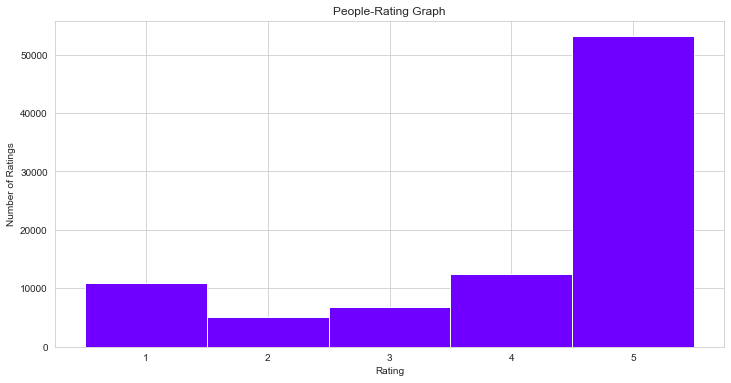

In [13]:
rating_histo_graph(df)

This Graph tells us about the frequency of a specific rating

From this we can conclude that most of the people liked Magazine from Amazon and some are just satisfied. But it's important to not that more than _10000_ people hated this service. That's why Amazon should analyze where the actual flaws are, whether they are in Products or they are in quality of service including user interfaces

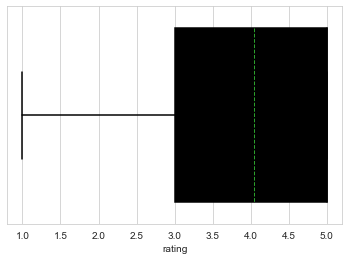

In [14]:
rating_boxplot(df)

BoxPlot tells us where most of the data lies

Here we can see that rating one to four constitute half of the data and the rest is just constituted by rating five. From that we can say that half of the audience loves the product of this category while other half has different opinions according to their experience

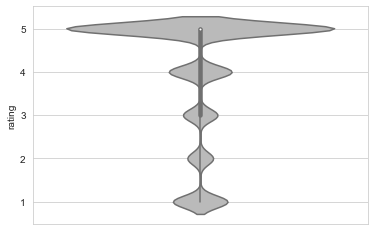

In [15]:
rating_violinplot(df)

Violin Plot provides us with some extra info about data distribution, i.e. Concentration of data points, distribution of data points

Here we can see that most of the population of Data lies in 5 Star rating, that is more denser than 4 Star and 1 Star gradually. Thus we can say most of the audience loves the product of this category

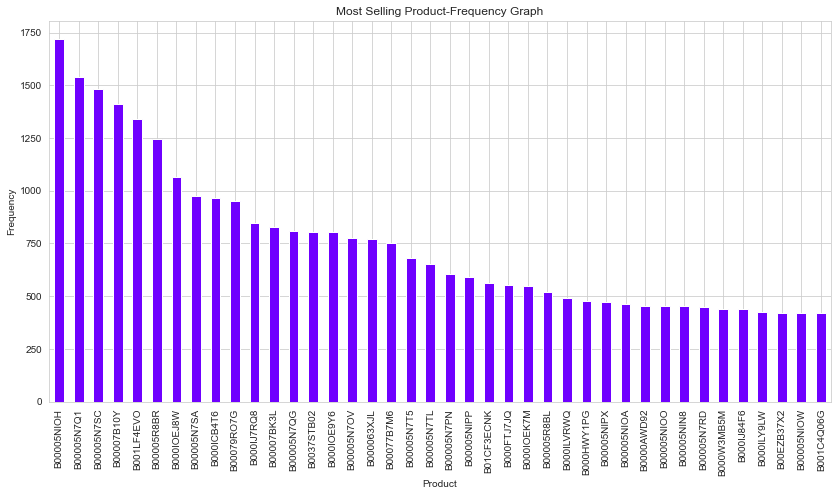

In [16]:
product_freq_graph_most_sold(df)

This Graph tells us about the frequency of a specific product being rated/reviewed in terms of ***Most Selling Product***

These are the top 40 Products that have the highest frequency of reviews. It also infers that these products bought by the same number of customers. However it is possible that any of the above product is not sold by that number but got reviews. That's another case, we will discuss it later. However, according to the reviews, the products are the hotest in this category.

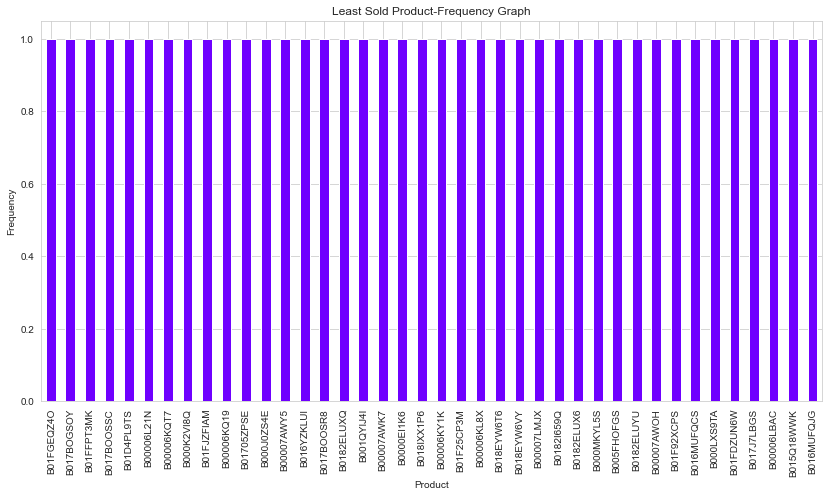

In [17]:
product_freq_graph_least_sold(df)

This Graph tells us about the frequency of a specific product being rated/reviewed in terms of ***Least Selling Product***

These are the top 40 Products that have the lowest frequency of reviews. These product only get sold once in all. However we are assuming that these products bought by the same number of customers. Again it is possible that any of the above product is not sold by that number but got such less reviews.

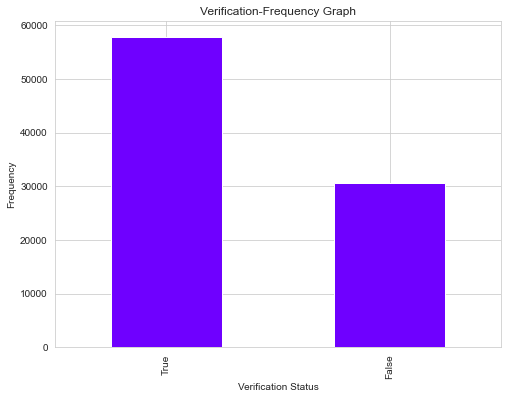

In [18]:
verified_reviews_graph(df)

This Graph tells us about the frequency of ***Verified and Unverified*** reviews represented by ***True and False*** respectively. Let's understand what is meant by Verified and Unverified reviews on Amazon

An ***Amazon Verified Purchase*** review indicates that the author of the review bought the product on Amazon. It also means that they purchased the product at full price without a discount. ***Unverified*** reviews mean that the reviewers did not purchase the product on the Amazon marketplace. It can also mean that the reviewer purchased the product at a discounted price. However, people review some of the products they have used before from elsewhere like, Movies, Books, etc, but people review it on Amazon sharing their thoughts that leads the reviews to unverified category which is not so useful according to Amazon's ranking algorithm

As you see that we were uncertain about the authencity of reviews, and we were supposing that these were the products which were purchased most/least by the customers. Above graph shows why we were a little uncertain. More than 30k reviews are not verified means whether they don't belong to the actual buyer or the product was purchased on discount. In this way fake reviews can get classified too with badge. However, reviews and their verification status are related. Let's come to know how strong this relationship is.

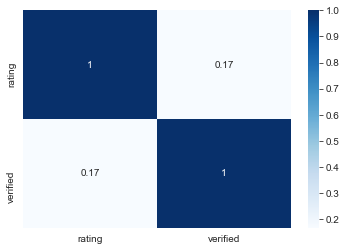

In [19]:
df_corr_heatmap(df)

This Correlation Heat-Map tells us the extent to which two variables are linearly related (meaning they change together at a constant rate). Thus we can show whether and how strongly variables are related with each other. Typically the value of correlation coefficient (***r***) ranges from (***-1 to +1***), with the following common relations

- ***r = 0*** means no relation between variables
- ***r > 0*** means Direct relation between variables
- ***r < 0*** means Inverse relation between variables
- Square the ***r*** value to get the realtion percentage

From above matrix we can find that relationship between verification status and review is about ***0.02 %***, that's is a really weak relation. But still they both are related. Obviously they are in direct relation means they will grow side by side. In simple words, more is the number of reviews more is the chance of a review being verified/unverified

In [20]:
df_verify = df.dropna()

Let's drop null values to get further graphs and analysis

In [21]:
df_verify.shape

(23771, 6)

Number of Reviews reduced now, there is no more Null valued reviews in Data now

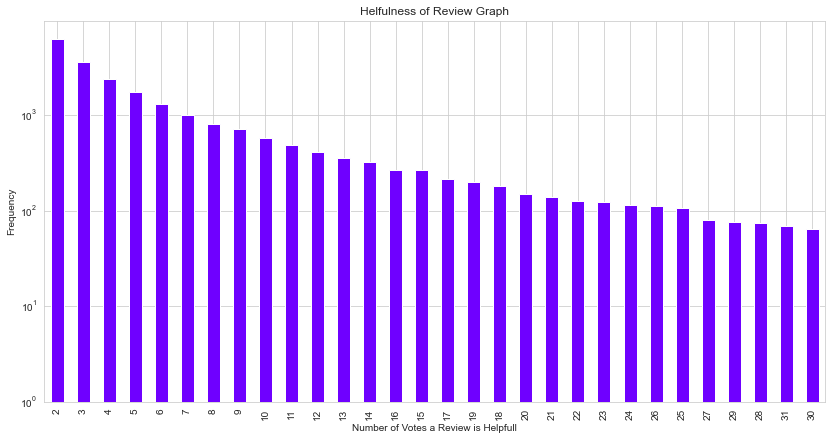

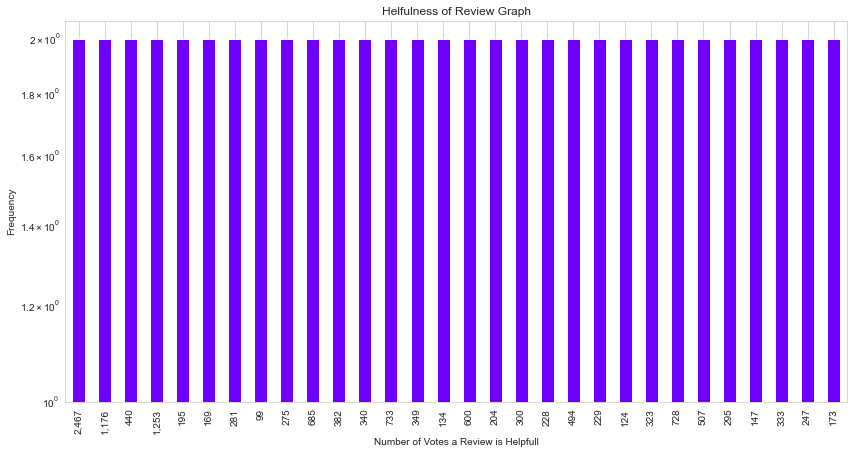

In [22]:
vote_helpfulness_graph(df)

Above graph shows how many reviews are how much helpful. For example there are more than 1k reviews that got helpful vote for only 2 times and there are less than 100 reviews that got helpful vote 30 times. From this we can conclude that in general frequency of reviews decreases as they get helpful vote. We can also conclude that so much irrelevant reviews are making more helpful reviews unfindable. So reviewers should review properly so that it can add value to someone's purchases

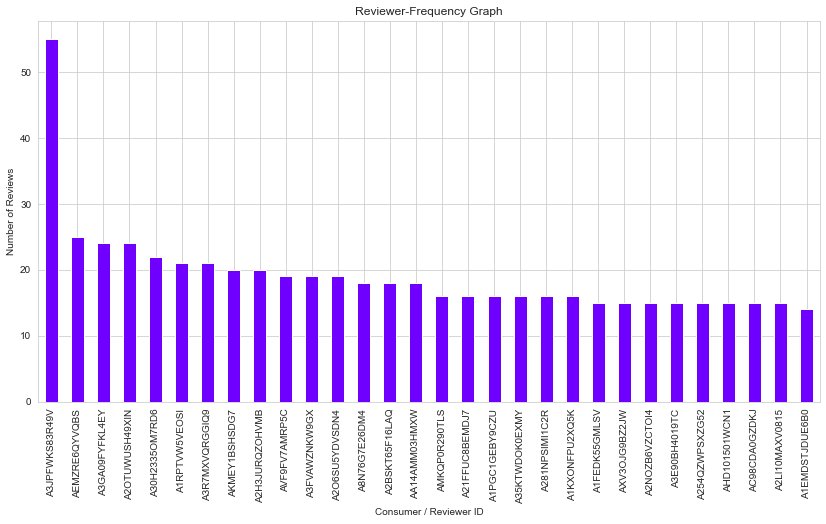

In [23]:
most_frequent_users_graph(df)

Above graph shows frequency of reviewers with the same uncertainity discussed for verified/unverified reviews. Amazon can give them discounts, or gift cards or any other related discounts to get more purchases from them. For least frequency users, Amazon can figure out the cause why those users are not purchasing products from Amazon, using surveys, feedbacks, reporting or anyother technique, to improve Amazon productivity.

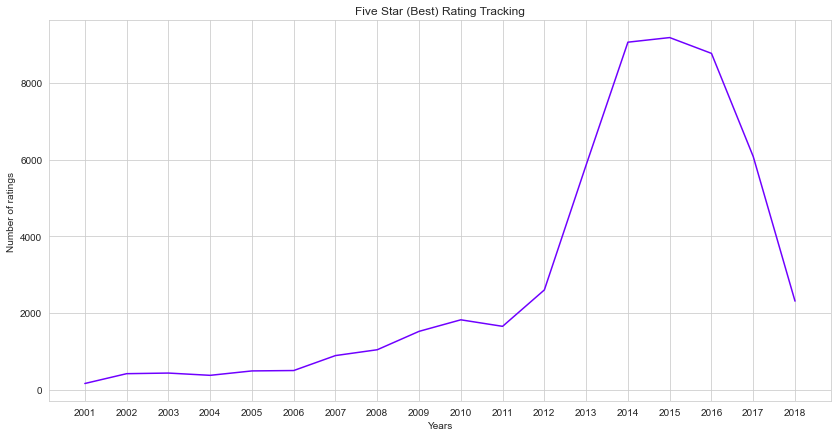

In [24]:
five_star_rating_graph()

Above graph shows frequency of best rating over 18 years. Rating in the start was not so high on graph due to a number of reasons. Some of them may be as follow

- Less number of consumers in the start
- Low quality of Products
- Low quality of Service
- Lack in reliable resources

But as the time passed by Rating started to go up. Seems like people loved products

> To be continued 

with the same uncertainity discussed for verified/unverified reviews. Amazon can give them discounts, or gift cards or any other related discounts to get more purchases from them. For least frequency users, Amazon can figure out the cause why those users are not purchasing products from Amazon, using surveys, feedbacks, reporting or anyother technique, to improve Amazon productivity.

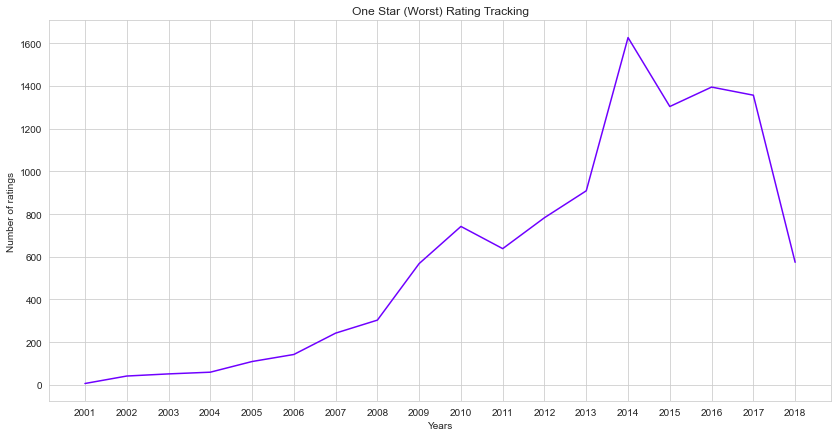

In [25]:
one_star_rating_graph()

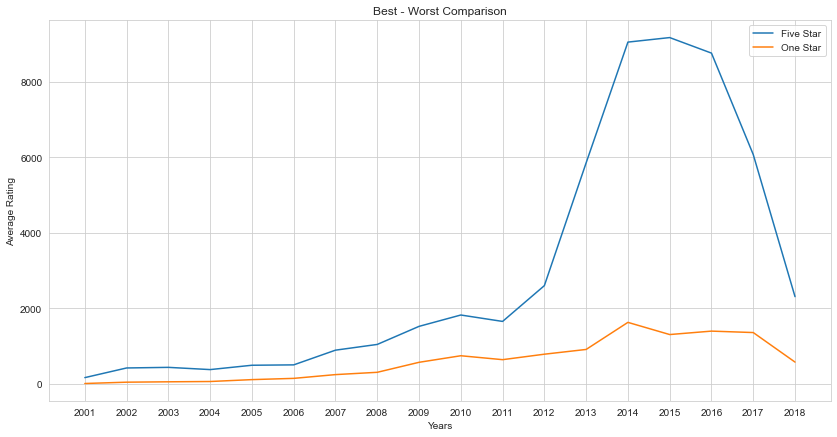

In [100]:
best_worst_rating_comparison()

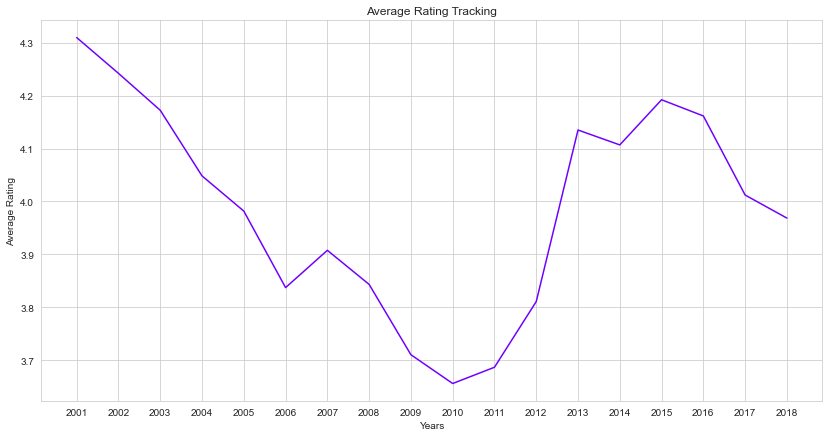

In [26]:
avg_rating_graph()

# _Gift Cards_

In [27]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Gift_Cards.csv')

In [31]:
df.head(2)

,rating,vote,verified,reviewerID,product_id,date
0,1,25,False,APV13CM0919JD,B001GXRQW0,1229644800
1,5,NaN,False,A3G8U1G1V082SN,B001GXRQW0,1229472000


In [32]:
rearrange_columns(df)

In [33]:
df.shape

(147160, 6)

In [34]:
df.head()

,rating,vote,verified,reviewerID,product_id,date
0,1,25,False,APV13CM0919JD,B001GXRQW0,2008-12-19
1,5,NaN,False,A3G8U1G1V082SN,B001GXRQW0,2008-12-17
2,5,4,False,A11T2Q0EVTUWP,B001GXRQW0,2008-12-17
3,5,NaN,False,A9YKGBH3SV22C,B001GXRQW0,2008-12-17
4,1,NaN,True,A34WZIHVF3OKOL,B001GXRQW0,2008-12-17


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147160 entries, 0 to 147159
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   rating      147160 non-null  int32         
 1   vote        6341 non-null    object        
 2   verified    147160 non-null  bool          
 3   reviewerID  147160 non-null  object        
 4   product_id  147160 non-null  object        
 5   date        147160 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 5.2+ MB


In [36]:
print(df.isnull().sum())

rating             0
vote          140819
verified           0
reviewerID         0
product_id         0
date               0
dtype: int64


In [37]:
get_first_review_date(df)

Timestamp('2008-12-06 00:00:00')

In [38]:
get_last_review_date(df)

Timestamp('2018-09-30 00:00:00')

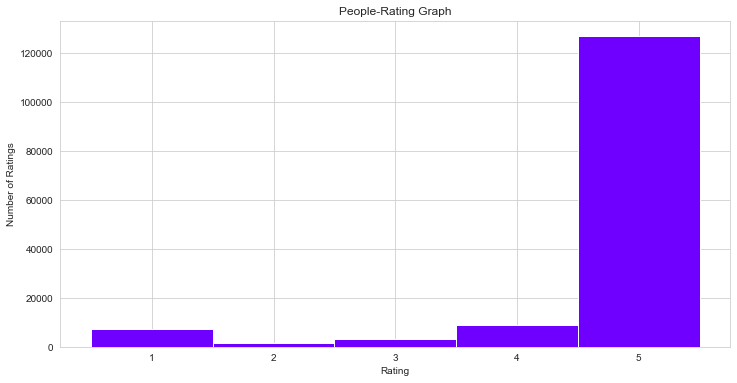

In [39]:
rating_histo_graph(df)

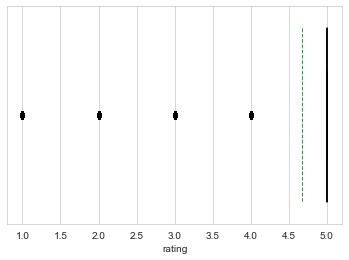

In [40]:
rating_boxplot(df)

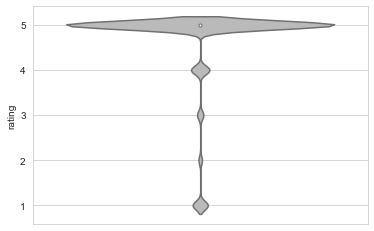

In [41]:
rating_violinplot(df)

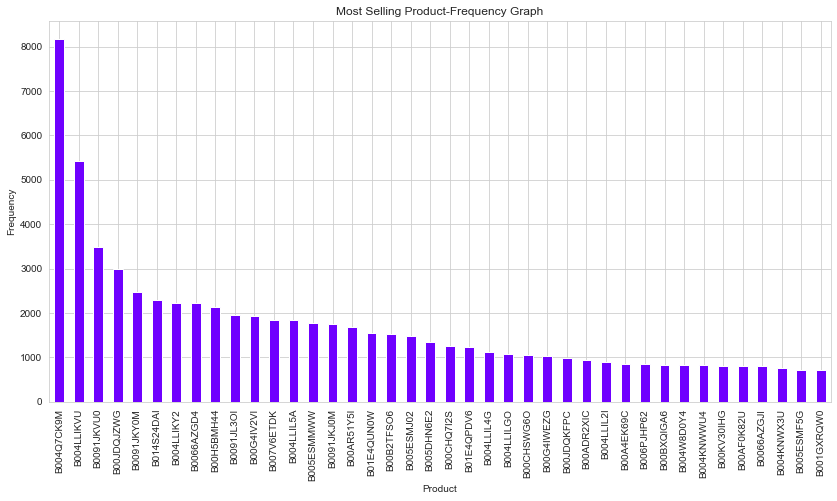

In [42]:
product_freq_graph_most_sold(df)

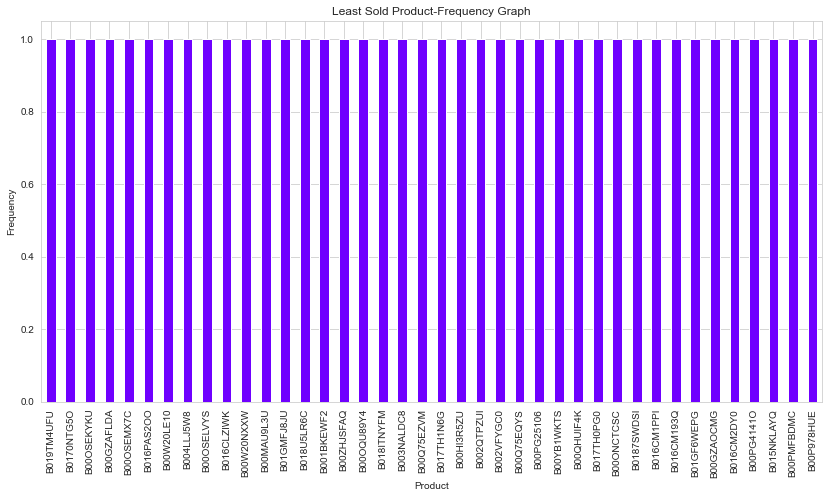

In [43]:
product_freq_graph_least_sold(df)

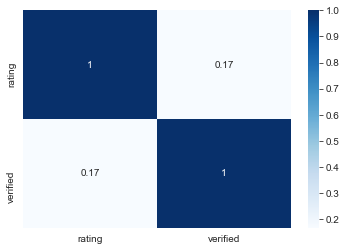

In [44]:
df_corr_heatmap(df)

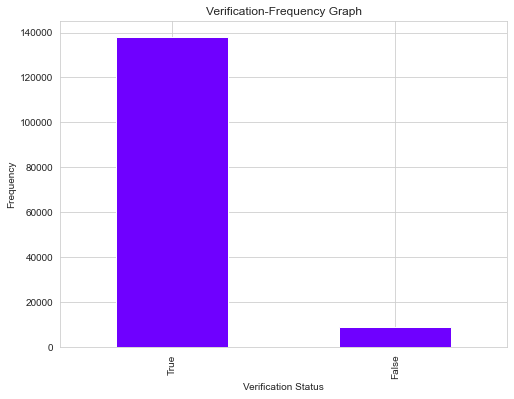

In [45]:
verified_reviews_graph(df)

In [46]:
df_verify = df.dropna()

In [47]:
df_verify.shape

(6341, 6)

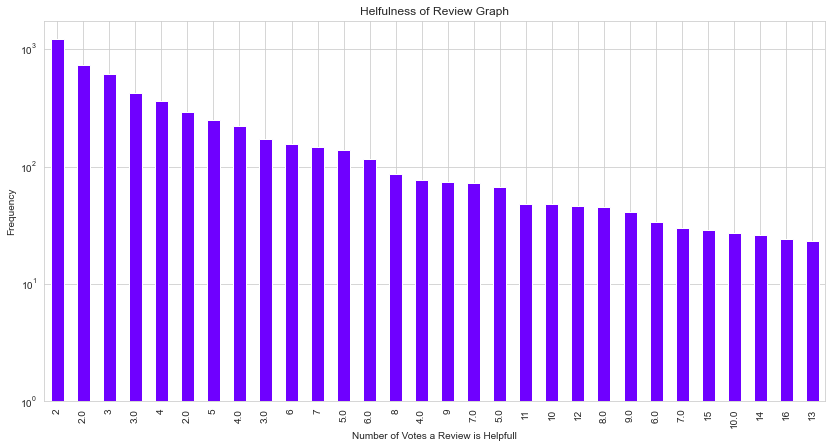

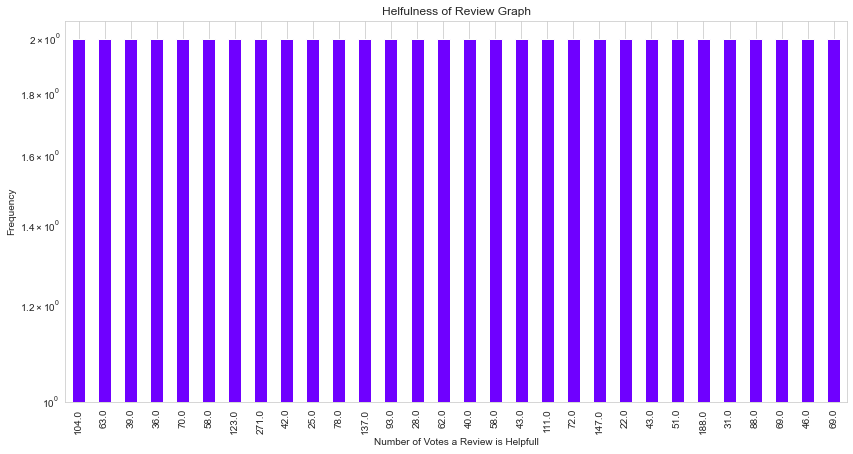

In [48]:
vote_helpfulness_graph(df)

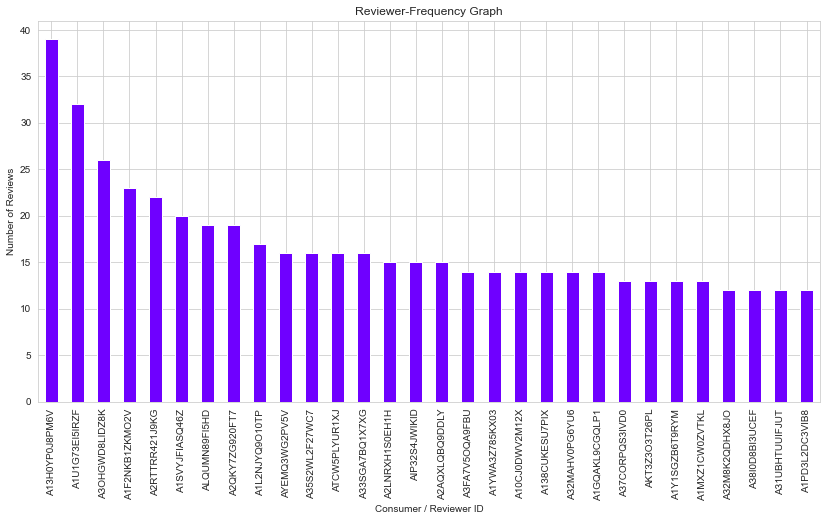

In [49]:
most_frequent_users_graph(df)

In [32]:
five_star_rating_graph()

TypeError: Invalid comparison between dtype=int64 and str

In [33]:
one_star_rating_graph()

TypeError: Invalid comparison between dtype=int64 and str

# _All Beauty_

In [47]:
df = pd.read_csv('E:\\amazon-eda-datasets\\All_Beauty.csv')

In [48]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,1,True,A1V6B6TNIC10QE,0143026860,1424304000,NaN
1,4,True,A2F5GHSXFQ0W6J,0143026860,1418860800,NaN


In [49]:
rearrange_columns(df)

In [50]:
df.shape

(362404, 6)

In [51]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,1,True,A1V6B6TNIC10QE,0143026860,2015-02-19,NaN
1,4,True,A2F5GHSXFQ0W6J,0143026860,2014-12-18,NaN
2,4,True,A1572GUYS7DGSR,0143026860,2014-08-10,NaN
3,5,True,A1PSGLFK1NSVO,0143026860,2013-03-11,NaN
4,5,True,A6IKXKZMTKGSC,0143026860,2011-12-25,5


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362404 entries, 0 to 362403
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   rating      362404 non-null  int32         
 1   verified    362404 non-null  bool          
 2   reviewerID  362404 non-null  object        
 3   product_id  362404 non-null  object        
 4   date        362404 non-null  datetime64[ns]
 5   vote        50504 non-null   object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 12.8+ MB


In [53]:
print(df.isnull().sum())

rating             0
verified           0
reviewerID         0
product_id         0
date               0
vote          311900
dtype: int64


In [54]:
get_first_review_date(df)

Timestamp('2000-01-10 00:00:00')

In [55]:
get_last_review_date(df)

Timestamp('2018-10-02 00:00:00')

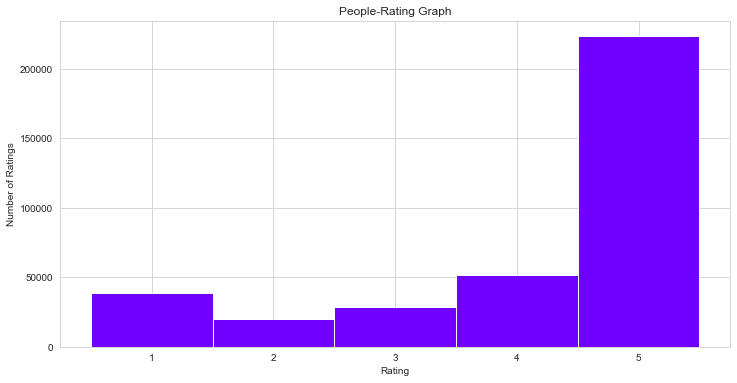

In [56]:
rating_histo_graph(df)

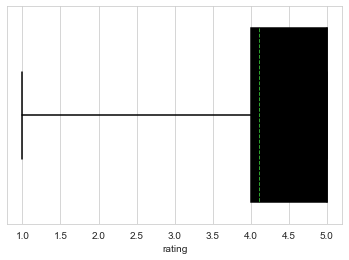

In [57]:
rating_boxplot(df)

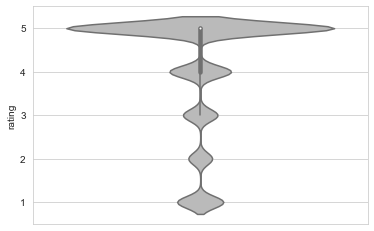

In [58]:
rating_violinplot(df)

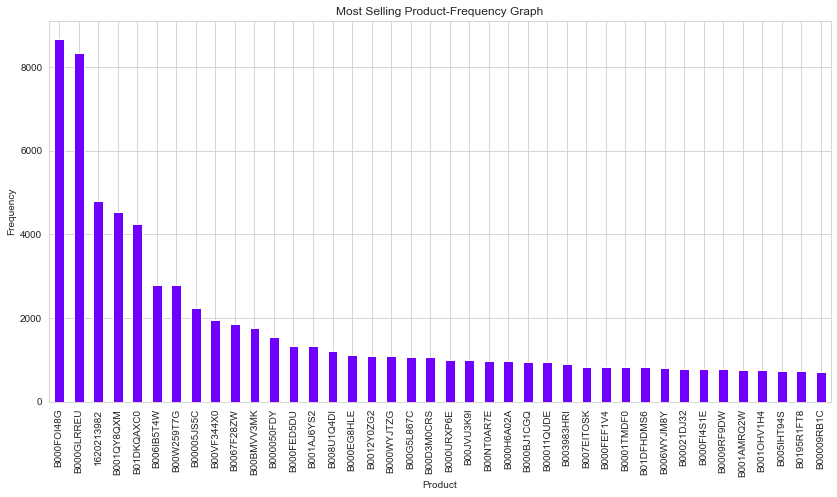

In [59]:
product_freq_graph_most_sold(df)

In [ ]:
product_freq_graph_least_sold(df)

,rating,verified
rating,1.000000,0.166468
verified,0.166468,1.000000


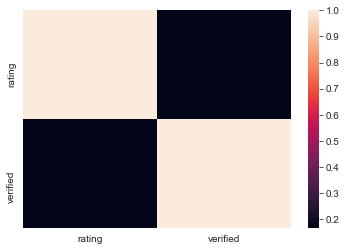

In [371]:
df_corr_heatmap(df)

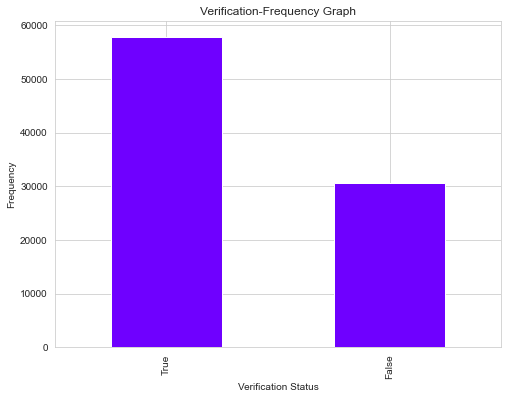

In [23]:
verified_reviews_graph(df)

In [62]:
df_verify = df.dropna()

In [63]:
df_verify.shape

(50504, 6)

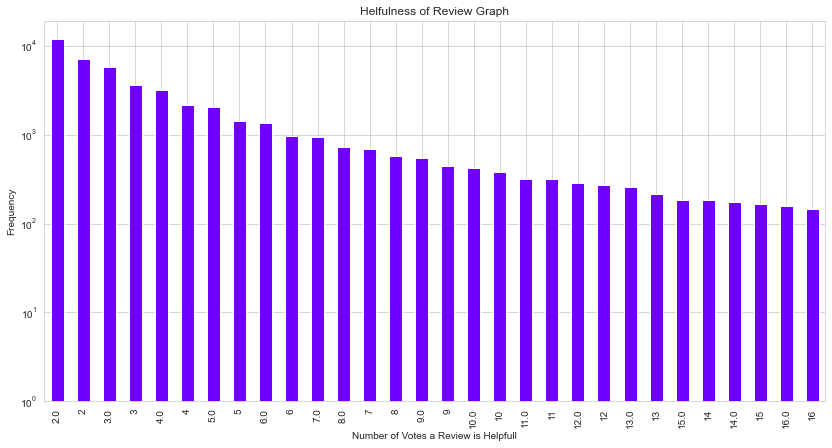

In [64]:
vote_helpfulness_graph(df)

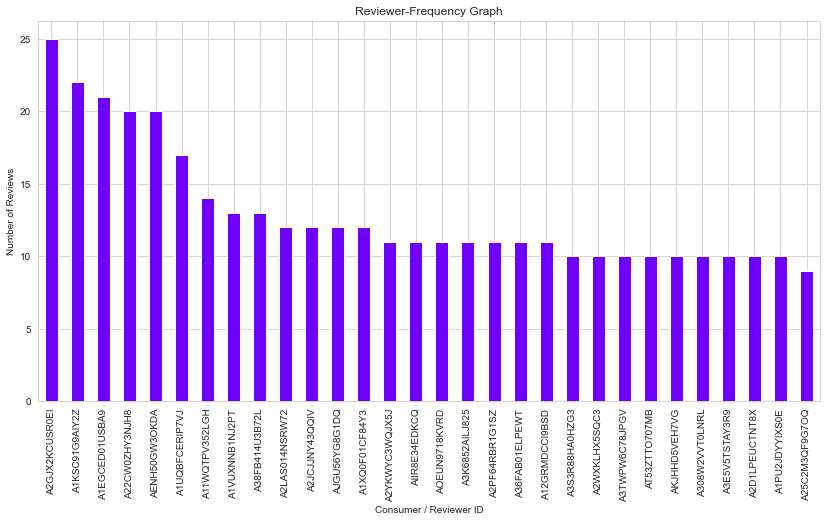

In [65]:
most_frequent_users_graph(df)

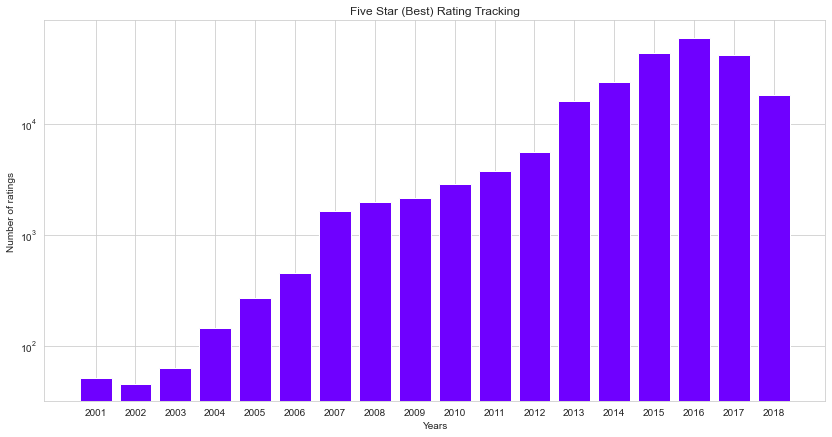

In [66]:
five_star_rating_graph()

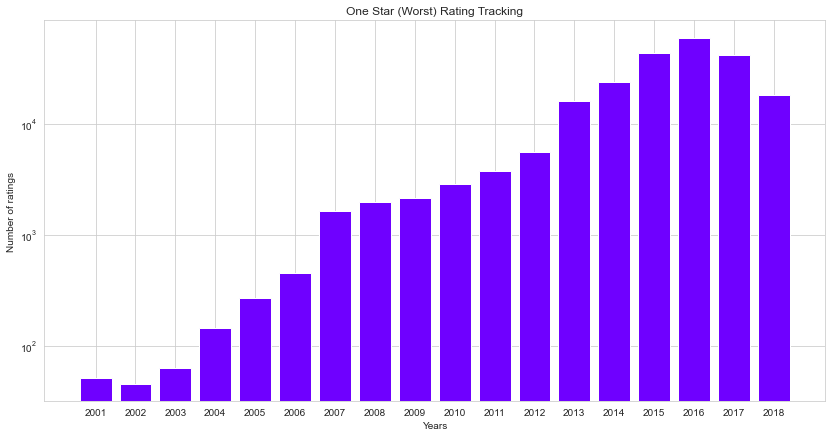

In [67]:
one_star_rating_graph()

# _Appliances_

In [68]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Appliances.csv')

In [69]:
df.head(2)

,rating,vote,verified,reviewerID,product_id,date
0,5,2,False,A3NHUQ33CFH3VM,1118461304,1385510400
1,5,NaN,False,A3SK6VNBQDNBJE,1118461304,1383264000


In [70]:
rearrange_columns(df)

In [71]:
df.shape

(591287, 6)

In [72]:
df.head()

,rating,vote,verified,reviewerID,product_id,date
0,5,2,False,A3NHUQ33CFH3VM,1118461304,2013-11-27
1,5,NaN,False,A3SK6VNBQDNBJE,1118461304,2013-11-01
2,5,NaN,False,A3SOFHUR27FO3K,1118461304,2013-10-10
3,5,NaN,False,A1HOG1PYCAE157,1118461304,2013-10-09
4,5,10,False,A26JGAM6GZMM4V,1118461304,2013-09-07


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591287 entries, 0 to 591286
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   rating      591287 non-null  int32         
 1   vote        61629 non-null   object        
 2   verified    591287 non-null  bool          
 3   reviewerID  591287 non-null  object        
 4   product_id  591287 non-null  object        
 5   date        591287 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 20.9+ MB


In [74]:
print(df.isnull().sum())

rating             0
vote          529658
verified           0
reviewerID         0
product_id         0
date               0
dtype: int64


In [75]:
get_first_review_date(df)

Timestamp('2000-10-23 00:00:00')

In [76]:
get_last_review_date(df)

Timestamp('2018-10-04 00:00:00')

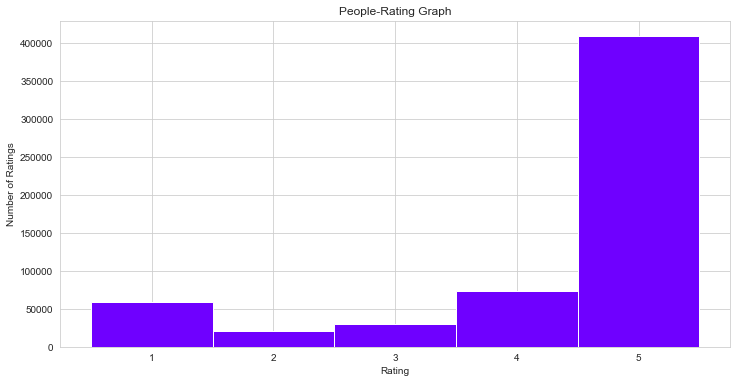

In [77]:
rating_histo_graph(df)

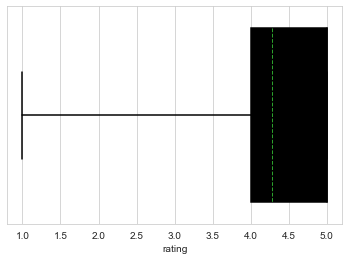

In [78]:
rating_boxplot(df)

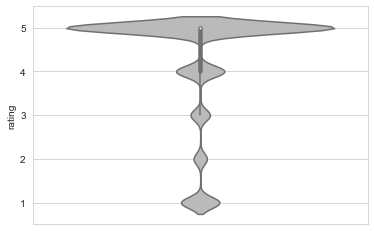

In [79]:
rating_violinplot(df)

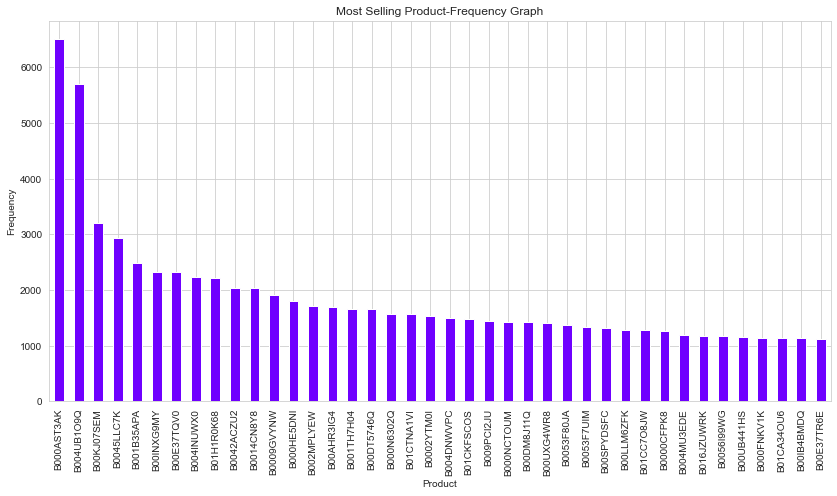

In [80]:
product_freq_graph_most_sold(df)

In [ ]:
product_freq_graph_least_sold(df)

,rating,verified
rating,1.000000,0.166468
verified,0.166468,1.000000


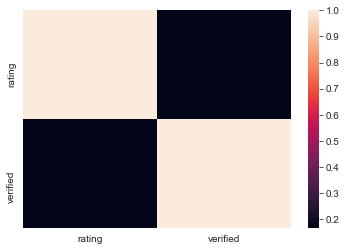

In [371]:
df_corr_heatmap(df)

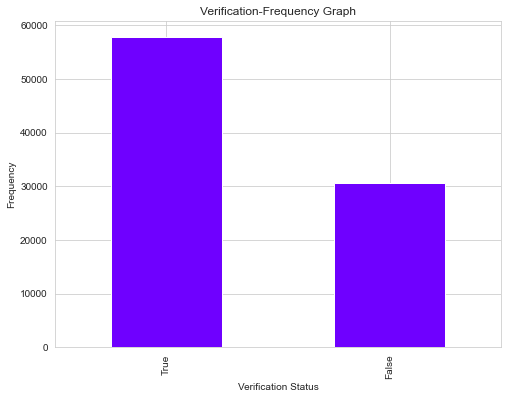

In [23]:
verified_reviews_graph(df)

In [83]:
df_verify = df.dropna()

In [84]:
df_verify.shape

(61629, 6)

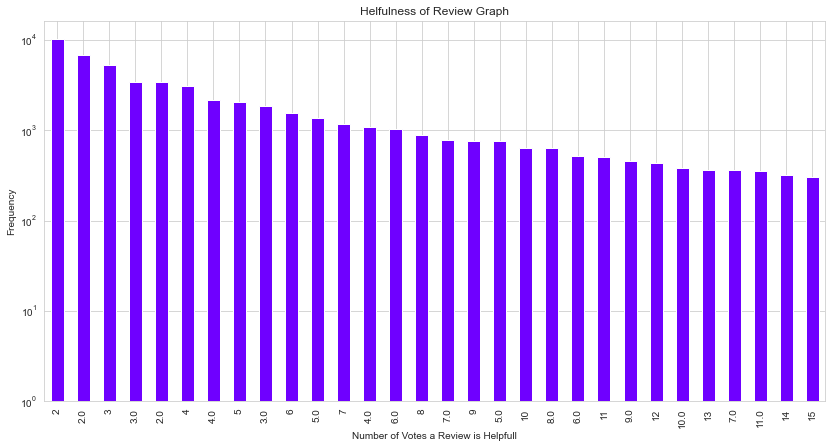

In [85]:
vote_helpfulness_graph(df)

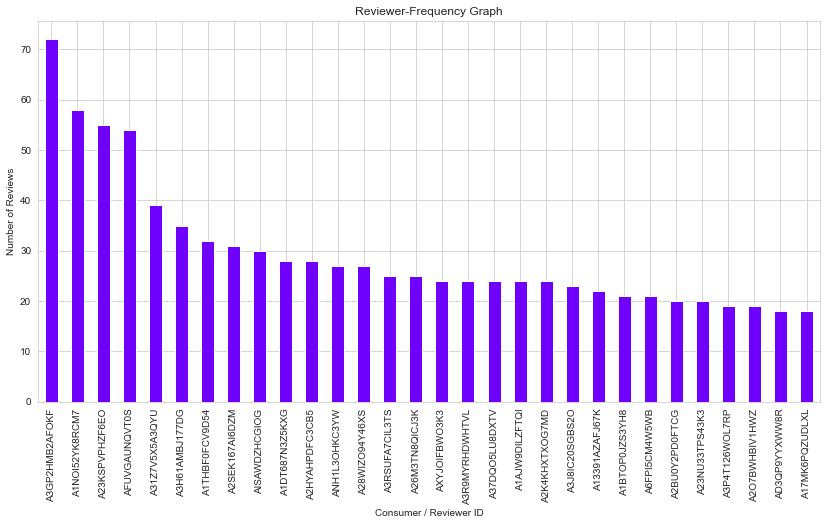

In [86]:
most_frequent_users_graph(df)

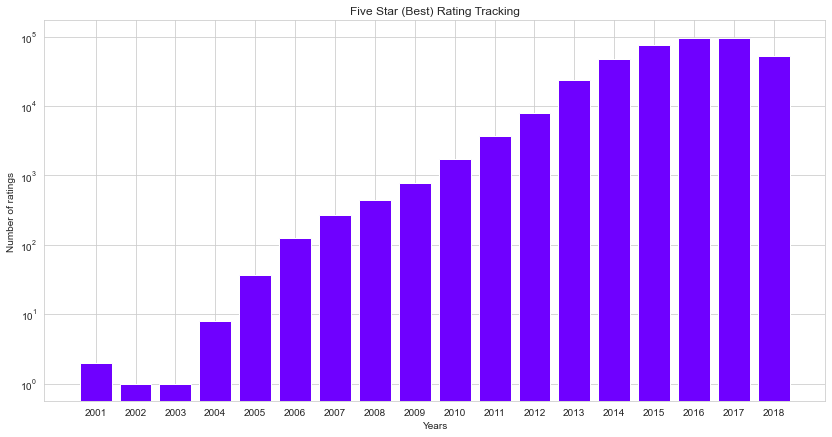

In [87]:
five_star_rating_graph()

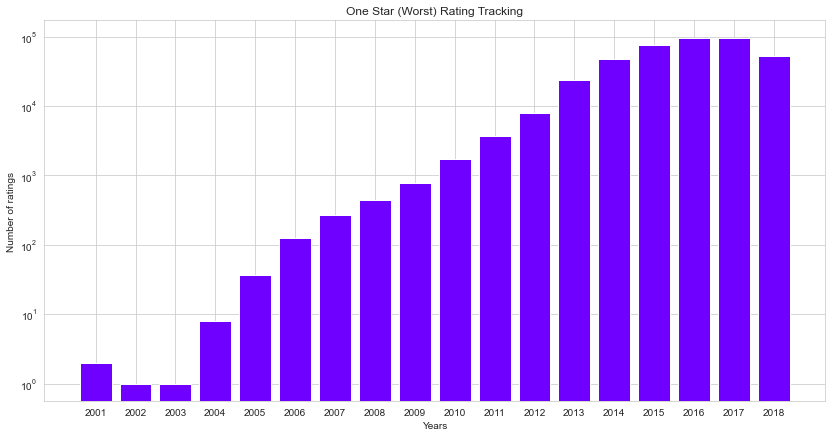

In [88]:
one_star_rating_graph()

# _Software_

In [89]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Software.csv')

In [90]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,4,True,A240ORQ2LF9LUI,0077613252,1394496000,NaN
1,4,True,A1YCCU0YRLS0FE,0077613252,1393113600,NaN


In [91]:
rearrange_columns(df)

In [92]:
df.shape

(450882, 6)

In [93]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,4,True,A240ORQ2LF9LUI,0077613252,2014-03-11,NaN
1,4,True,A1YCCU0YRLS0FE,0077613252,2014-02-23,NaN
2,1,True,A1BJHRQDYVAY2J,0077613252,2014-02-17,7
3,3,True,APRDVZ6QBIQXT,0077613252,2014-02-17,3
4,5,False,A2JZTTBSLS1QXV,0077775473,2013-10-14,NaN


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450882 entries, 0 to 450881
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   rating      450882 non-null  int32         
 1   verified    450882 non-null  bool          
 2   reviewerID  450882 non-null  object        
 3   product_id  450882 non-null  object        
 4   date        450882 non-null  datetime64[ns]
 5   vote        124289 non-null  object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 15.9+ MB


In [95]:
print(df.isnull().sum())

rating             0
verified           0
reviewerID         0
product_id         0
date               0
vote          326593
dtype: int64


In [96]:
get_first_review_date(df)

Timestamp('1998-12-04 00:00:00')

In [97]:
get_last_review_date(df)

Timestamp('2018-10-02 00:00:00')

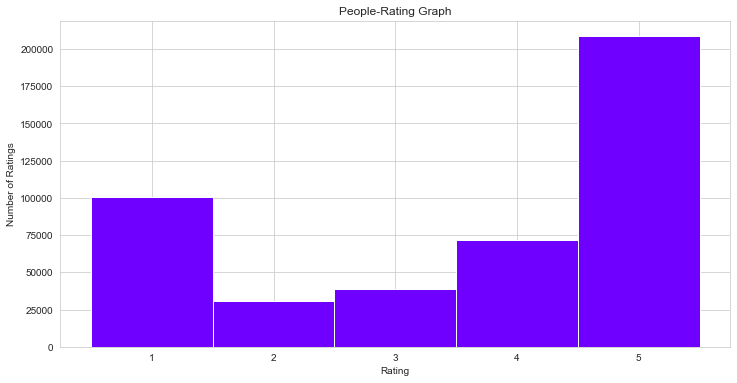

In [98]:
rating_histo_graph(df)

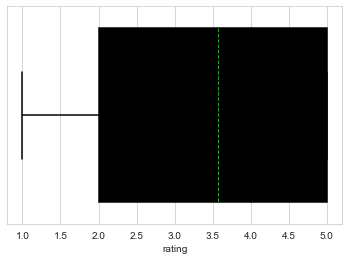

In [99]:
rating_boxplot(df)

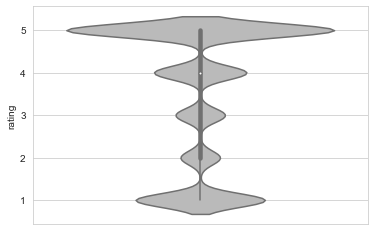

In [100]:
rating_violinplot(df)

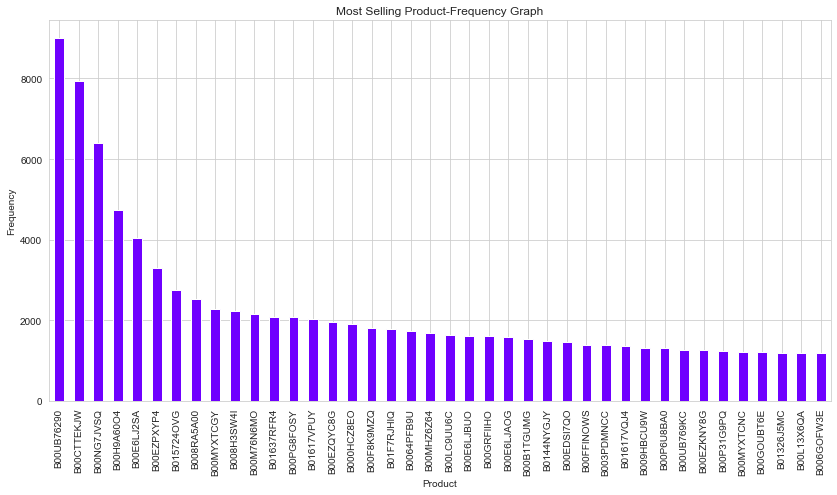

In [101]:
product_freq_graph_most_sold(df)

In [ ]:
product_freq_graph_least_sold(df)

,rating,verified
rating,1.000000,0.166468
verified,0.166468,1.000000


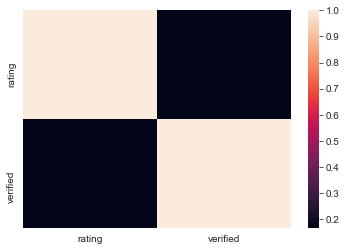

In [371]:
df_corr_heatmap(df)

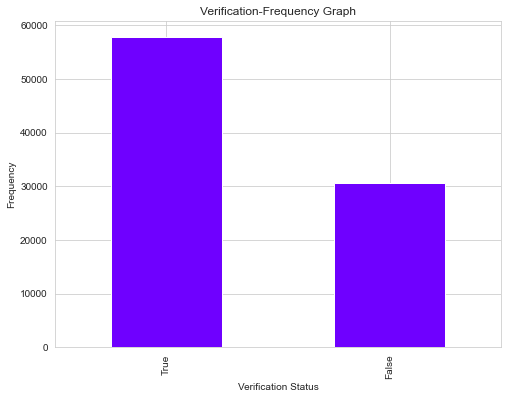

In [23]:
verified_reviews_graph(df)

In [104]:
df_verify = df.dropna()

In [105]:
df_verify.shape

(124289, 6)

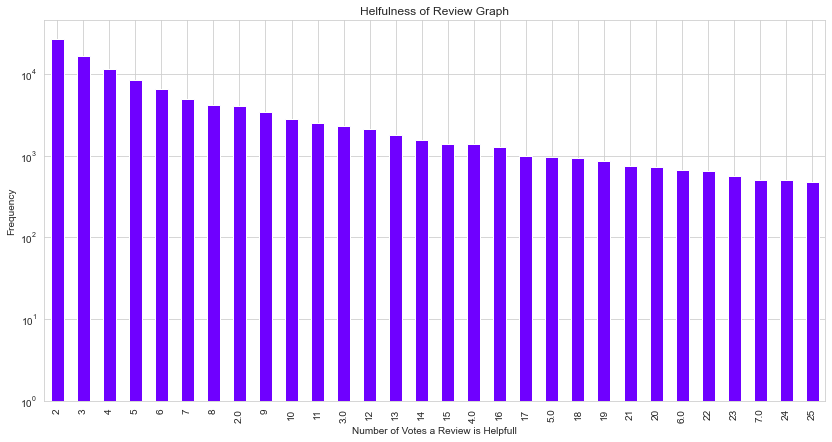

In [106]:
vote_helpfulness_graph(df)

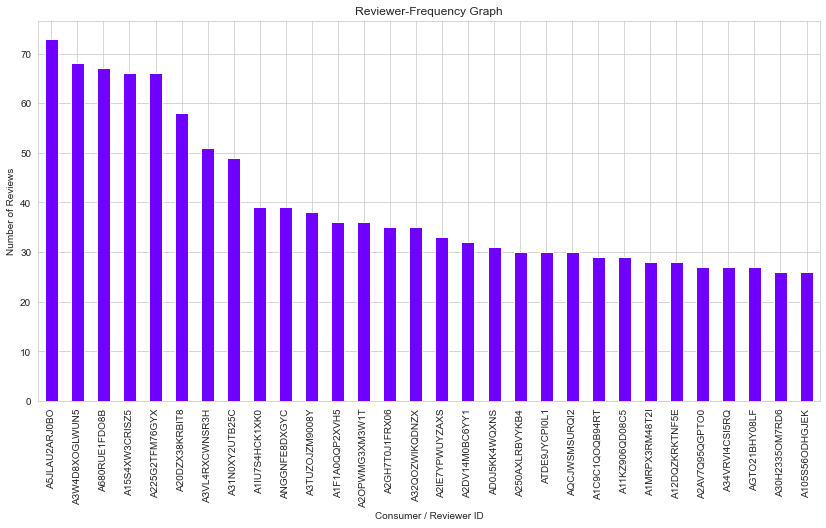

In [107]:
most_frequent_users_graph(df)

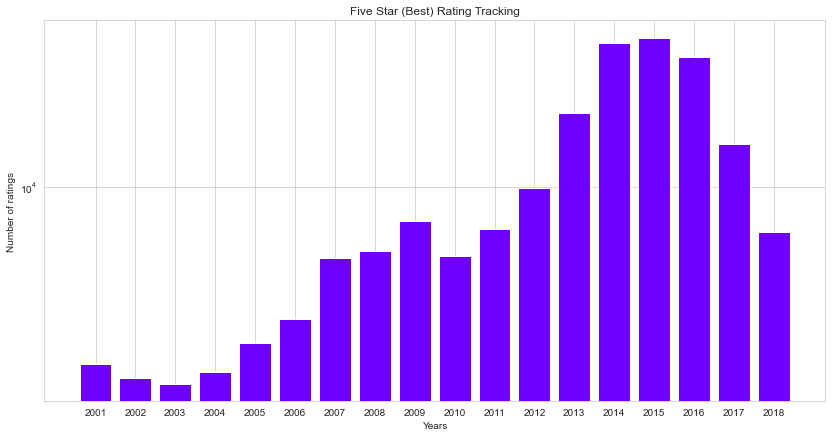

In [108]:
five_star_rating_graph()

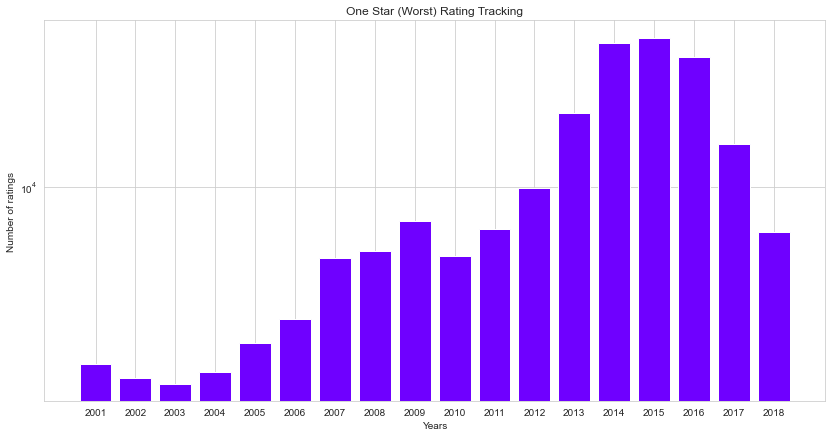

In [109]:
one_star_rating_graph()

# _Amazon Fashion_

In [70]:
df = pd.read_csv('E:\\amazon-eda-datasets\\AMAZON_FASHION.csv')

In [71]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,5,True,A1D4G1SNUZWQOT,7106116521,1413763200,NaN
1,2,True,A3DDWDH9PX2YX2,7106116521,1411862400,3.0


In [72]:
rearrange_columns(df)

In [73]:
df.shape

(875781, 6)

In [74]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,5,True,A1D4G1SNUZWQOT,7106116521,2014-10-20,NaN
1,2,True,A3DDWDH9PX2YX2,7106116521,2014-09-28,3.0
2,4,False,A2MWC41EW7XL15,7106116521,2014-08-25,NaN
3,2,True,A2UH2QQ275NV45,7106116521,2014-08-24,NaN
4,3,False,A89F3LQADZBS5,7106116521,2014-07-27,NaN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875781 entries, 0 to 875780
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   rating      875781 non-null  int32         
 1   verified    875781 non-null  bool          
 2   reviewerID  875781 non-null  object        
 3   product_id  875781 non-null  object        
 4   date        875781 non-null  datetime64[ns]
 5   vote        79335 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 30.9+ MB


In [76]:
print(df.isnull().sum())

rating             0
verified           0
reviewerID         0
product_id         0
date               0
vote          796446
dtype: int64


In [77]:
get_first_review_date(df)

Timestamp('2002-11-11 00:00:00')

In [78]:
get_last_review_date(df)

Timestamp('2018-10-01 00:00:00')

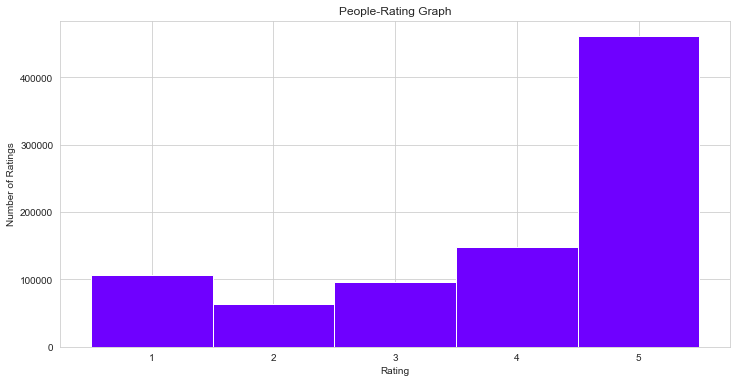

In [79]:
rating_histo_graph(df)

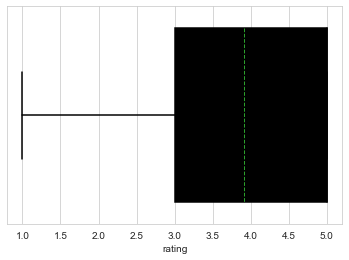

In [80]:
rating_boxplot(df)

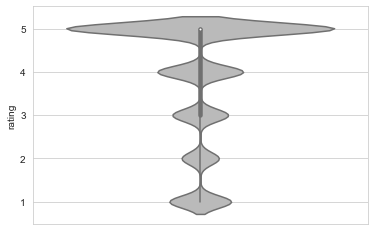

In [81]:
rating_violinplot(df)

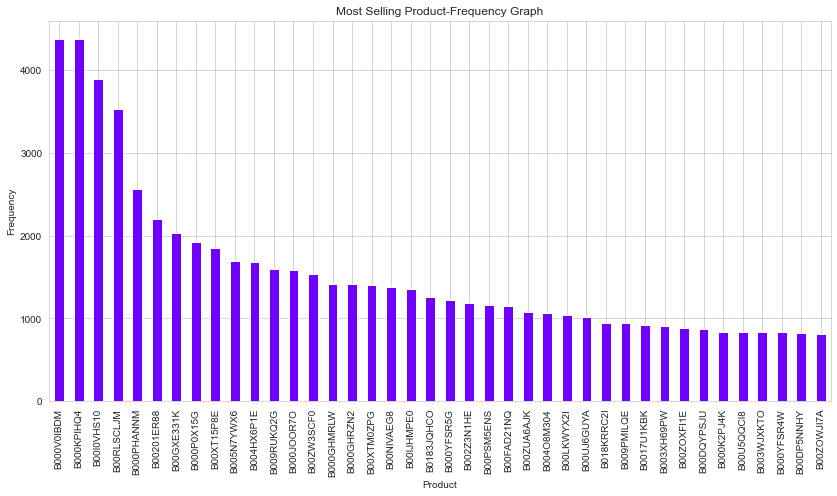

In [82]:
product_freq_graph_most_sold(df)

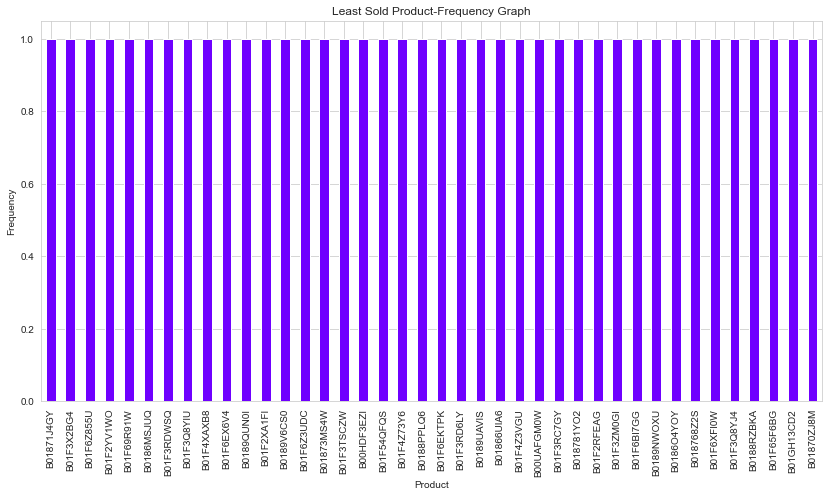

In [83]:
product_freq_graph_least_sold(df)

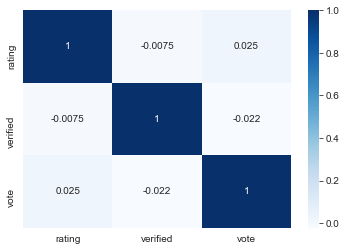

In [84]:
df_corr_heatmap(df)

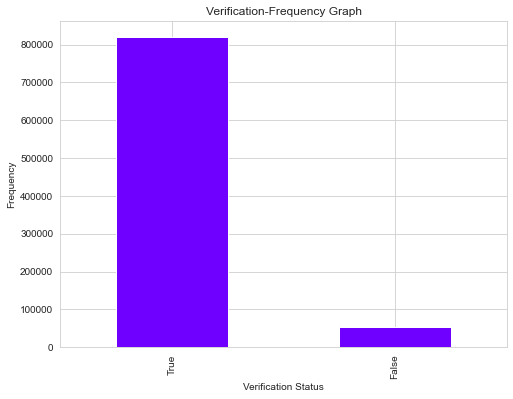

In [85]:
verified_reviews_graph(df)

In [86]:
df_verify = df.dropna()

In [87]:
df_verify.shape

(79335, 6)

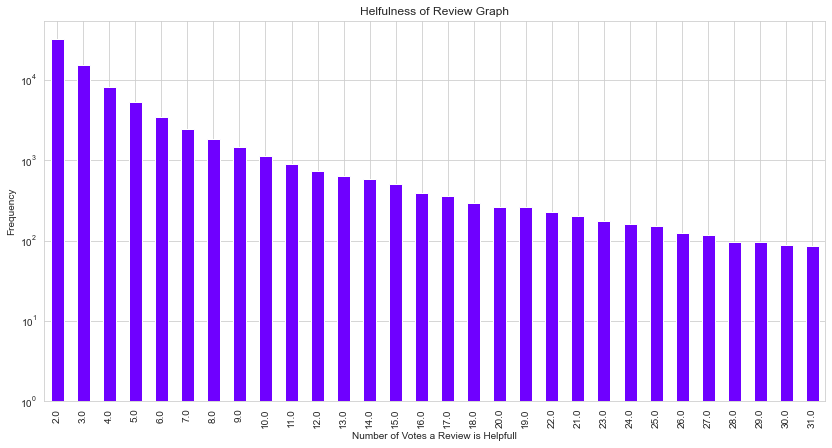

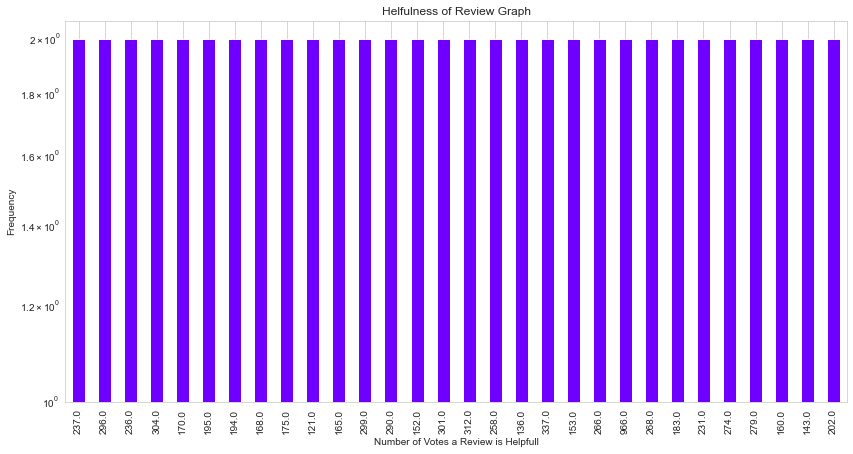

In [88]:
vote_helpfulness_graph(df)

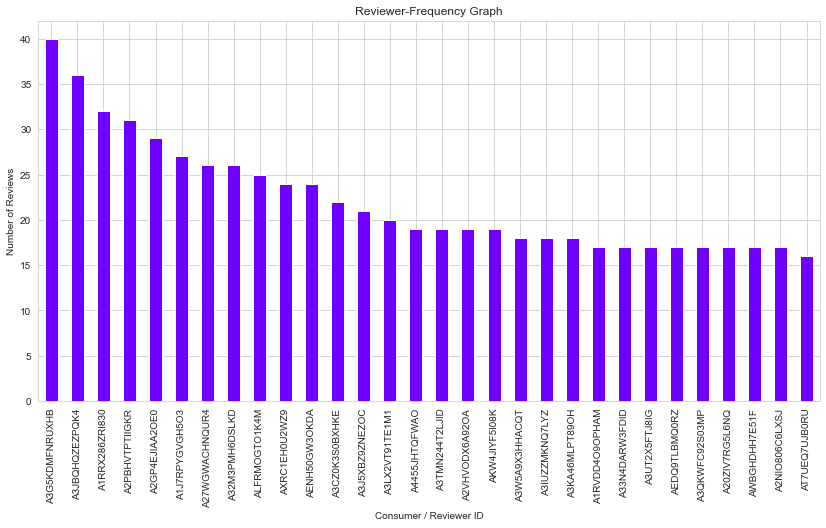

In [89]:
most_frequent_users_graph(df)

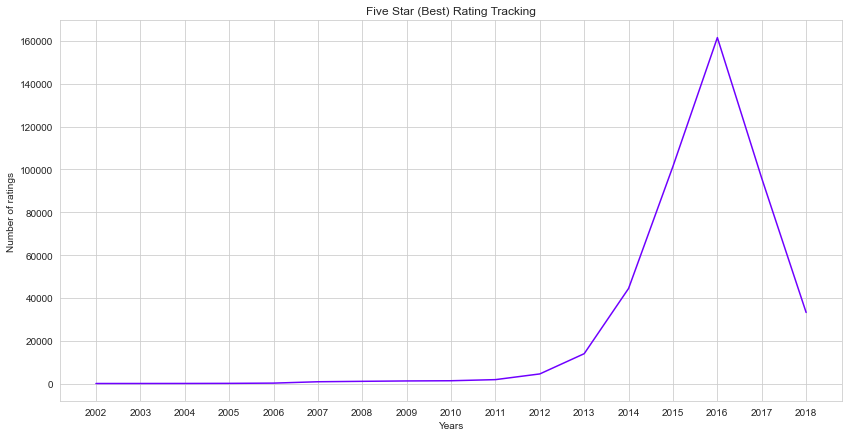

In [90]:
five_star_rating_graph()

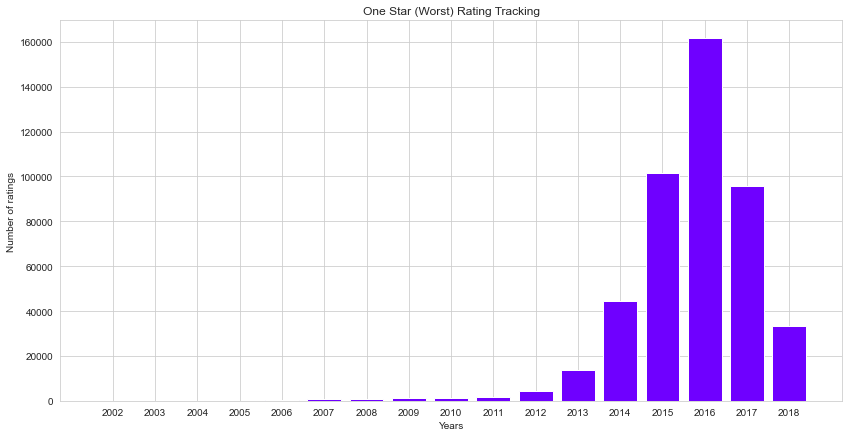

In [91]:
one_star_rating_graph()

# _Digital Music_

In [131]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Digital_Music.csv')

In [132]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,5,True,A1ZCPG3D3HGRSS,0001388703,1387670400,NaN
1,5,True,AC2PL52NKPL29,0001388703,1378857600,NaN


In [133]:
rearrange_columns(df)

In [134]:
df.shape

(1572906, 6)

In [135]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,5,True,A1ZCPG3D3HGRSS,0001388703,2013-12-22,NaN
1,5,True,AC2PL52NKPL29,0001388703,2013-09-11,NaN
2,5,True,A1SUZXBDZSDQ3A,0001388703,2013-03-02,NaN
3,5,True,A3A0W7FZXM0IZW,0001388703,2012-12-02,NaN
4,5,False,A12R54MKO17TW0,0001388703,2012-01-07,6.0


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572906 entries, 0 to 1572905
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   rating      1572906 non-null  int32         
 1   verified    1572906 non-null  bool          
 2   reviewerID  1572906 non-null  object        
 3   product_id  1572906 non-null  object        
 4   date        1572906 non-null  datetime64[ns]
 5   vote        124177 non-null   object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 55.5+ MB


In [137]:
print(df.isnull().sum())

rating              0
verified            0
reviewerID          0
product_id          0
date                0
vote          1448729
dtype: int64


In [138]:
get_first_review_date(df)

Timestamp('1997-10-20 00:00:00')

In [139]:
get_last_review_date(df)

Timestamp('2018-10-02 00:00:00')

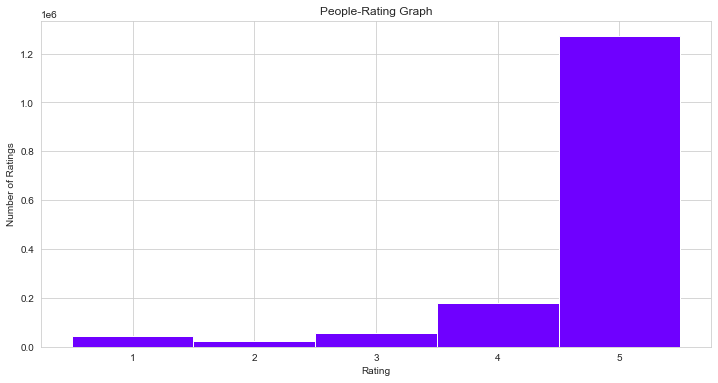

In [140]:
rating_histo_graph(df)

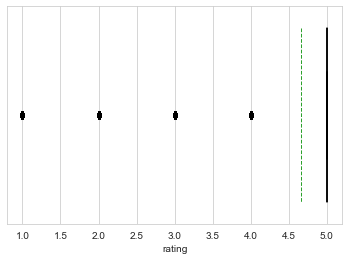

In [141]:
rating_boxplot(df)

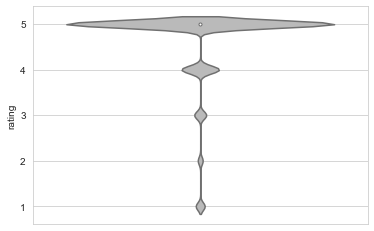

In [142]:
rating_violinplot(df)

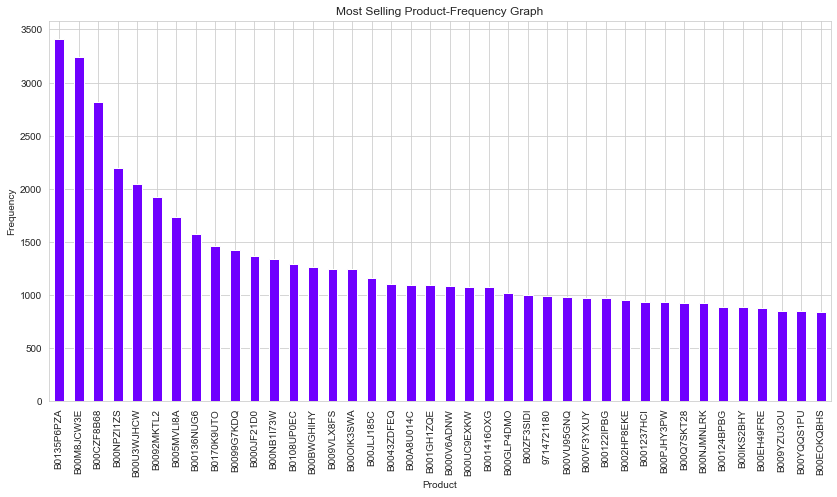

In [143]:
product_freq_graph_most_sold(df)

In [ ]:
product_freq_graph_least_sold(df)

,rating,verified
rating,1.000000,0.166468
verified,0.166468,1.000000


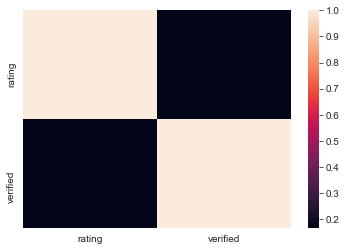

In [371]:
df_corr_heatmap(df)

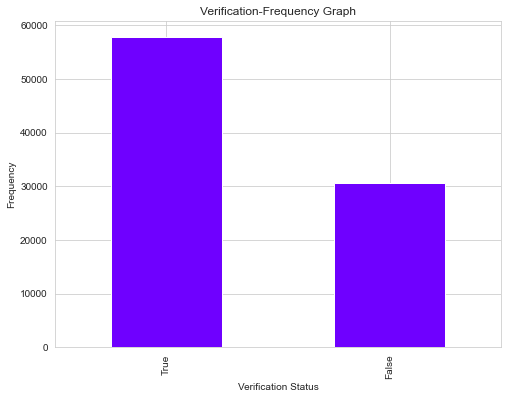

In [23]:
verified_reviews_graph(df)

In [146]:
df_verify = df.dropna()

In [147]:
df_verify.shape

(124177, 6)

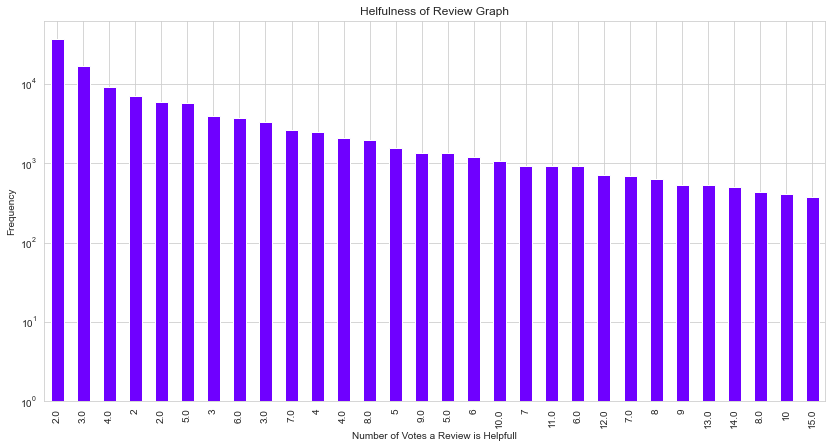

In [148]:
vote_helpfulness_graph(df)

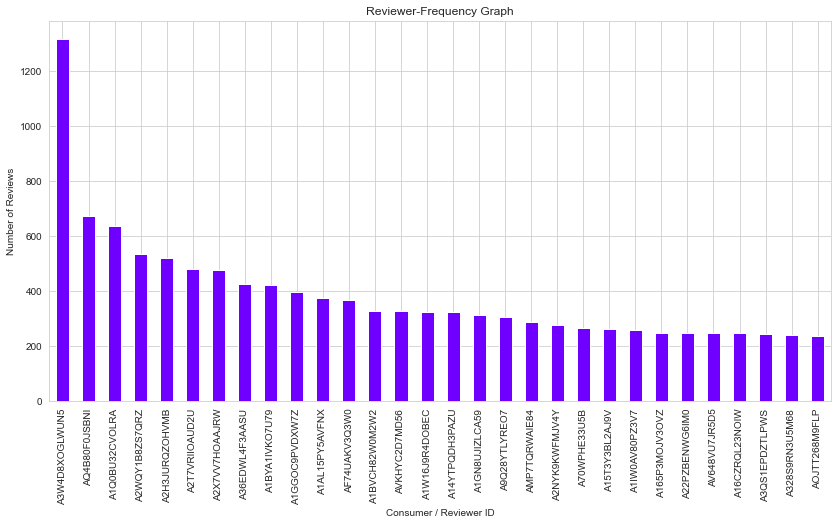

In [149]:
most_frequent_users_graph(df)

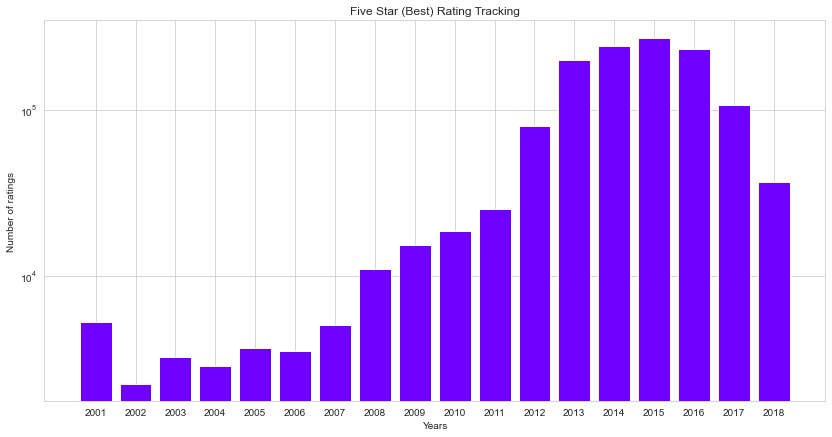

In [150]:
five_star_rating_graph()

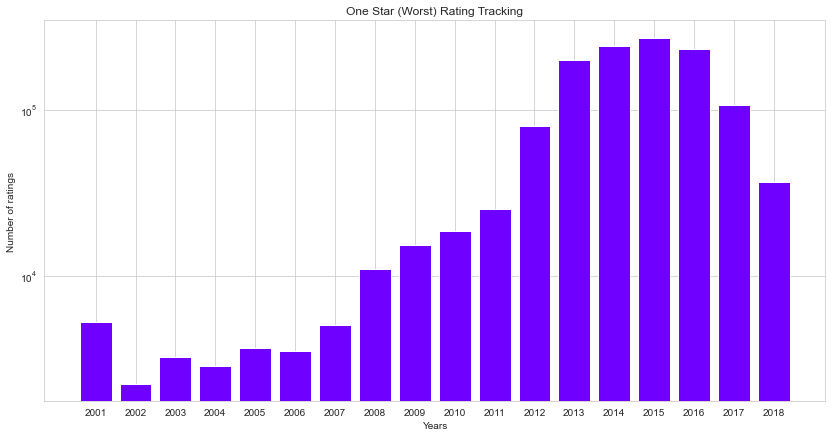

In [151]:
one_star_rating_graph()

# _Industrial and Scientific_

In [152]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Industrial_and_Scientific.csv')

In [153]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,5,True,A3FANY5GOT5X0W,0176496920,1358899200,NaN
1,5,True,AT6HRPPYOPHMB,0176496920,1352073600,NaN


In [154]:
rearrange_columns(df)

In [155]:
df.shape

(1713766, 6)

In [156]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,5,True,A3FANY5GOT5X0W,0176496920,2013-01-23,NaN
1,5,True,AT6HRPPYOPHMB,0176496920,2012-11-05,NaN
2,4,True,A4IX7B38LIN1E,0176496920,2012-10-17,NaN
3,5,True,A12Q4LR8N17AOZ,0176496920,2017-03-29,NaN
4,1,True,A1GJXZZPOZ3OD9,0176496920,2017-03-21,NaN


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713766 entries, 0 to 1713765
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   rating      int32         
 1   verified    bool          
 2   reviewerID  object        
 3   product_id  object        
 4   date        datetime64[ns]
 5   vote        object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 60.5+ MB


In [158]:
print(df.isnull().sum())

rating              0
verified            0
reviewerID          0
product_id          0
date                0
vote          1513111
dtype: int64


In [159]:
get_first_review_date(df)

Timestamp('1999-11-13 00:00:00')

In [160]:
get_last_review_date(df)

Timestamp('2018-10-05 00:00:00')

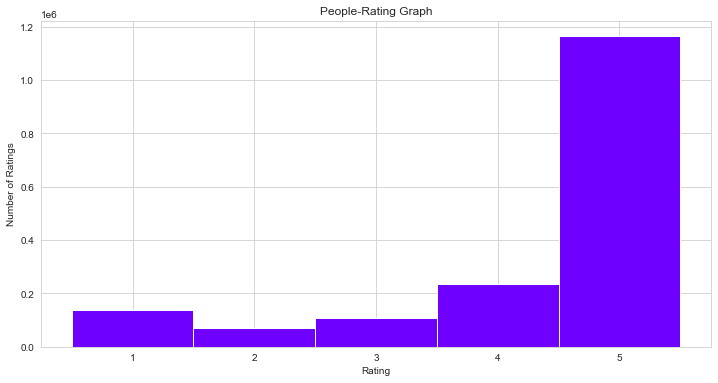

In [161]:
rating_histo_graph(df)

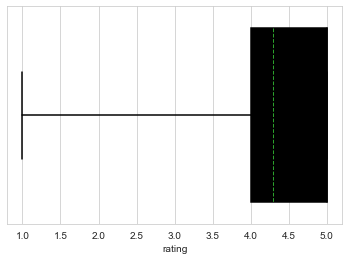

In [162]:
rating_boxplot(df)

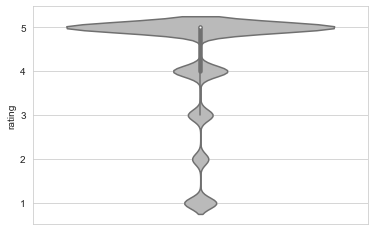

In [163]:
rating_violinplot(df)

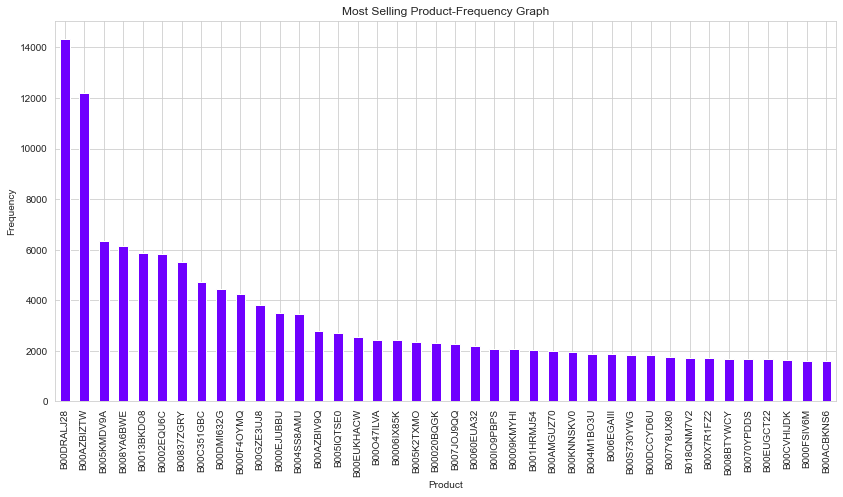

In [164]:
product_freq_graph_most_sold(df)

In [ ]:
product_freq_graph_least_sold(df)

,rating,verified
rating,1.000000,0.166468
verified,0.166468,1.000000


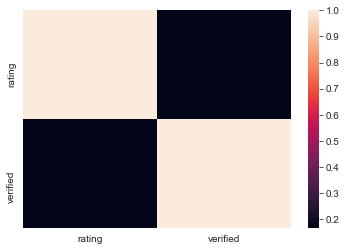

In [371]:
df_corr_heatmap(df)

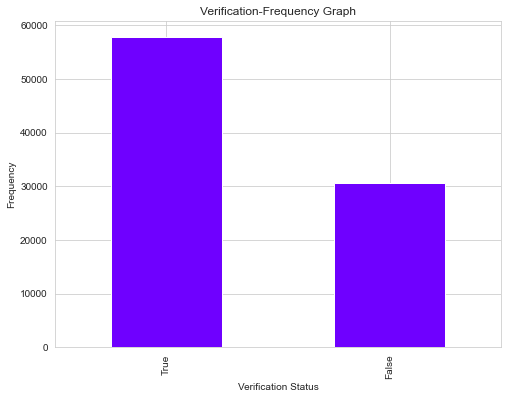

In [23]:
verified_reviews_graph(df)

In [167]:
df_verify = df.dropna()

In [168]:
df_verify.shape

(200655, 6)

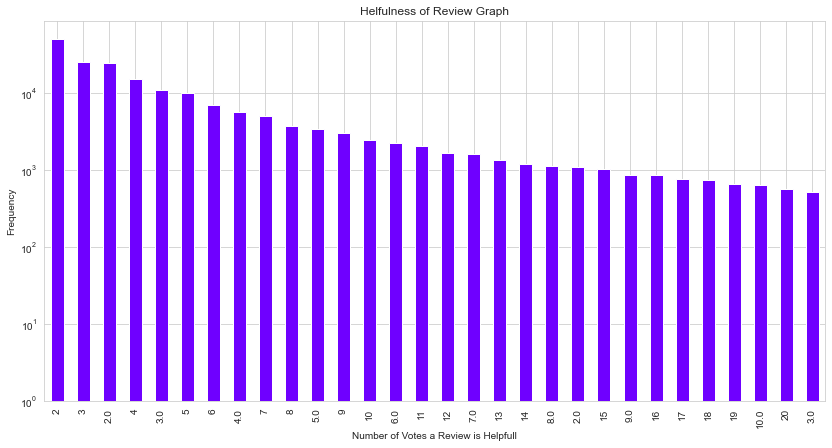

In [169]:
vote_helpfulness_graph(df)

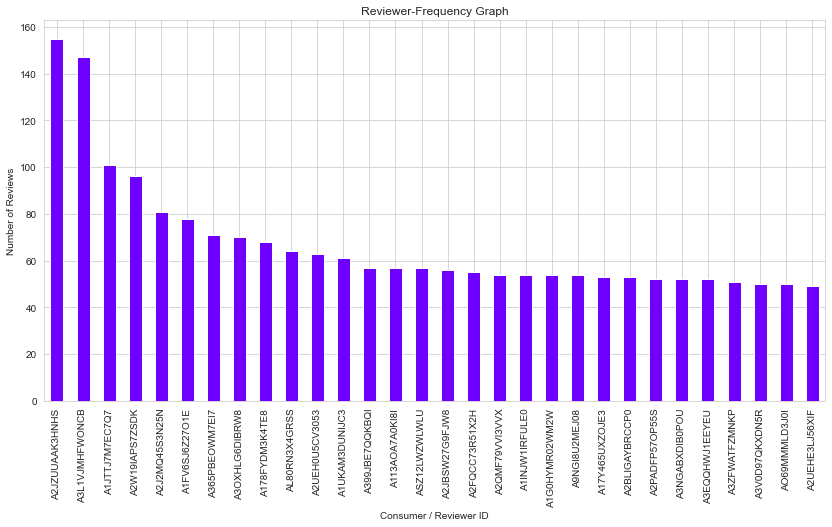

In [170]:
most_frequent_users_graph(df)

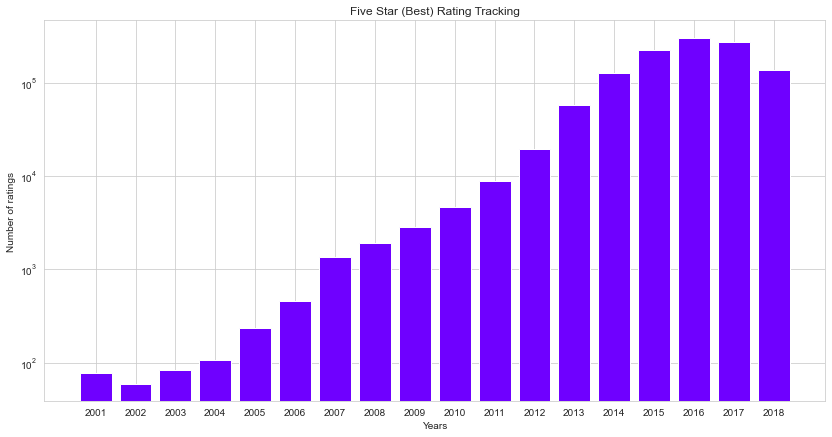

In [171]:
five_star_rating_graph()

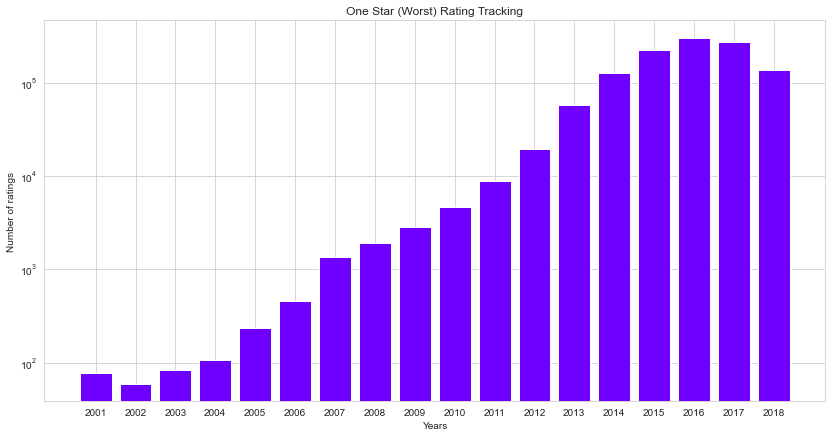

In [172]:
one_star_rating_graph()

# _Musical Instruments_

In [173]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Musical_Instruments.csv')

In [174]:
df.head(2)

,rating,vote,verified,reviewerID,product_id,date
0,5,90.0,False,AXHY24HWOF184,0470536454,1092009600
1,4,2.0,True,A29OWR79AM796H,0470536454,1491436800


In [175]:
rearrange_columns(df)

In [176]:
df.shape

(1473884, 6)

In [177]:
df.head()

,rating,vote,verified,reviewerID,product_id,date
0,5,90.0,False,AXHY24HWOF184,0470536454,2004-08-09
1,4,2.0,True,A29OWR79AM796H,0470536454,2017-04-06
2,5,NaN,True,AUPWU27A7X5F6,0470536454,2017-03-14
3,4,NaN,True,A1N69A47D4JO6K,0470536454,2017-02-14
4,5,NaN,True,AHTIQUMVCGBFJ,0470536454,2017-01-29


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473884 entries, 0 to 1473883
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   rating      1473884 non-null  int32         
 1   vote        236929 non-null   object        
 2   verified    1473884 non-null  bool          
 3   reviewerID  1473884 non-null  object        
 4   product_id  1473884 non-null  object        
 5   date        1473884 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 52.0+ MB


In [179]:
print(df.isnull().sum())

rating              0
vote          1236955
verified            0
reviewerID          0
product_id          0
date                0
dtype: int64


In [180]:
get_first_review_date(df)

Timestamp('2000-01-05 00:00:00')

In [181]:
get_last_review_date(df)

Timestamp('2018-10-04 00:00:00')

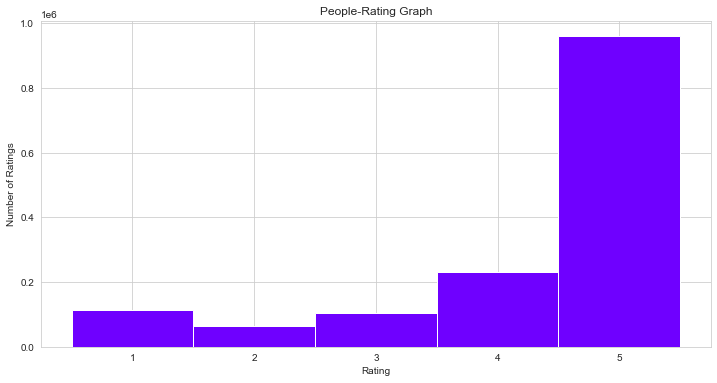

In [182]:
rating_histo_graph(df)

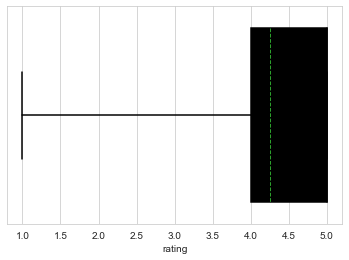

In [183]:
rating_boxplot(df)

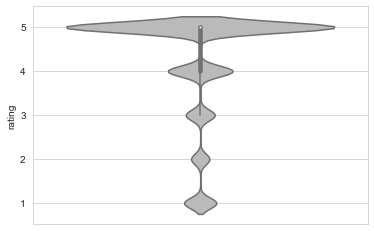

In [184]:
rating_violinplot(df)

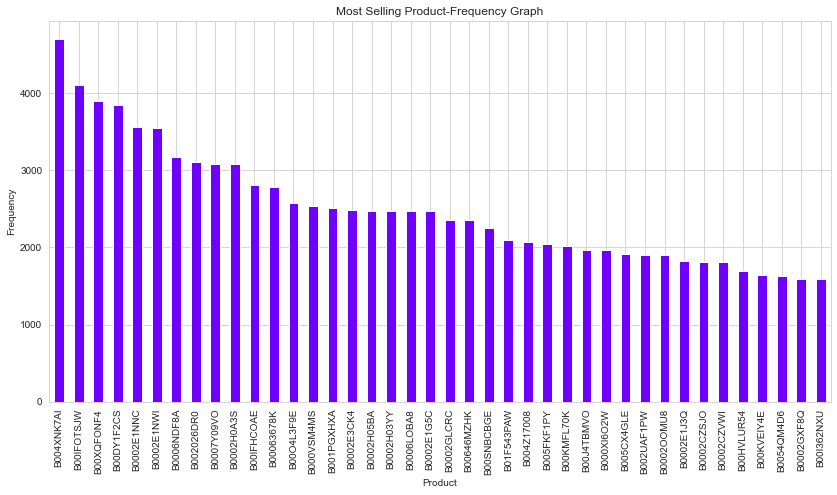

In [185]:
product_freq_graph_most_sold(df)

In [ ]:
product_freq_graph_least_sold(df)

,rating,verified
rating,1.000000,0.166468
verified,0.166468,1.000000


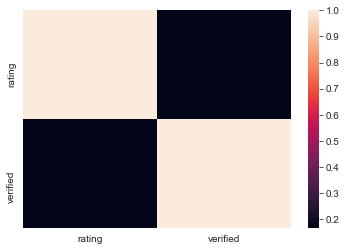

In [371]:
df_corr_heatmap(df)

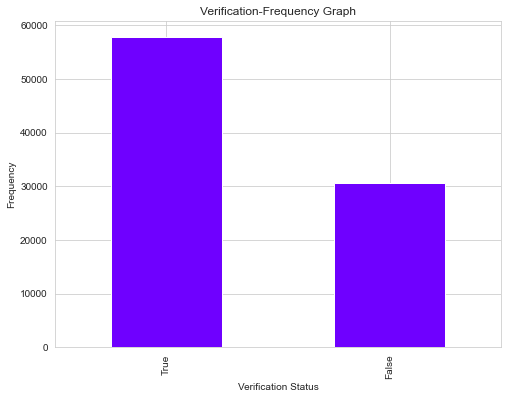

In [23]:
verified_reviews_graph(df)

In [188]:
df_verify = df.dropna()

In [189]:
df_verify.shape

(236929, 6)

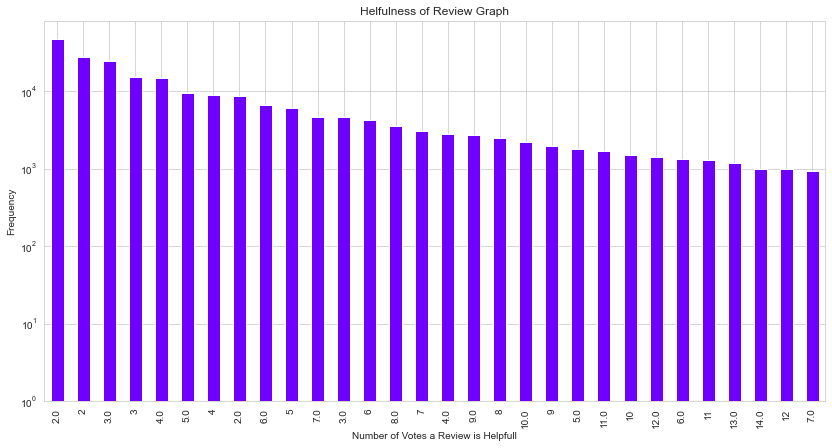

In [190]:
vote_helpfulness_graph(df)

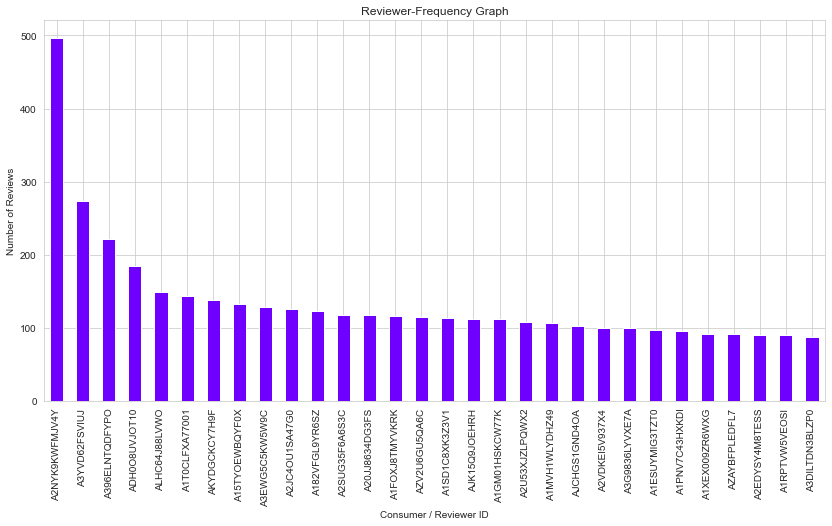

In [191]:
most_frequent_users_graph(df)

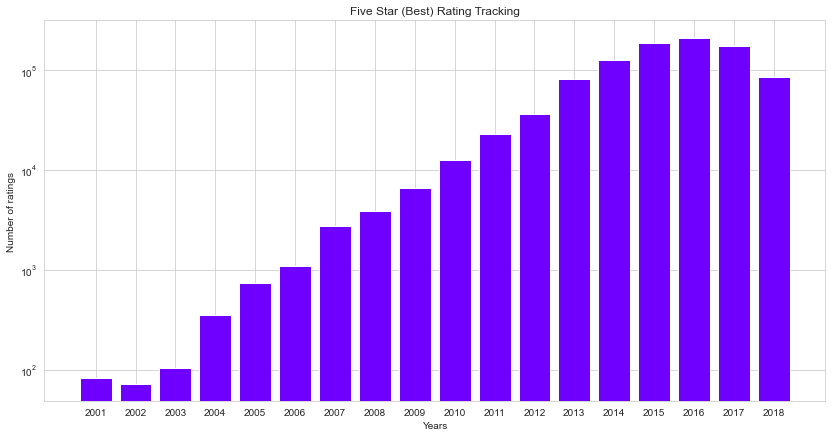

In [192]:
five_star_rating_graph()

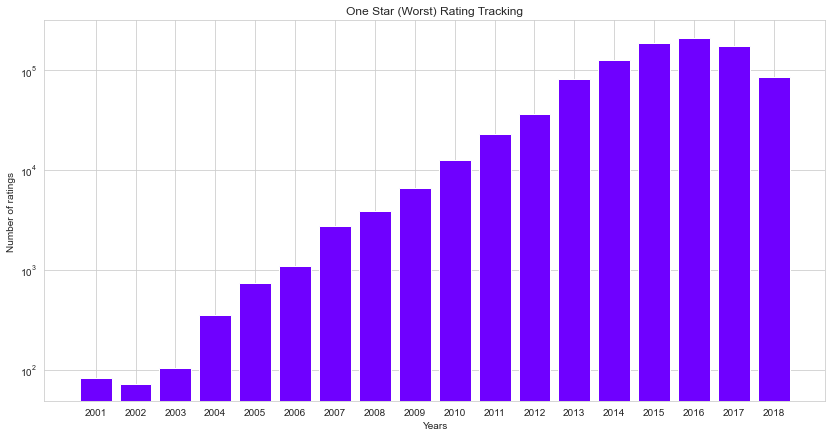

In [193]:
one_star_rating_graph()

# _Video Games_

In [194]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Video_Games.csv')

In [195]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,1,True,A21ROB4YDOZA5P,0439381673,1402272000,NaN
1,3,True,A3TNZ2Q5E7HTHD,0439381673,1399680000,NaN


In [196]:
rearrange_columns(df)

In [197]:
df.shape

(2553981, 6)

In [198]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,1,True,A21ROB4YDOZA5P,0439381673,2014-06-09,NaN
1,3,True,A3TNZ2Q5E7HTHD,0439381673,2014-05-10,NaN
2,4,True,A1OKRM3QFEATQO,0439381673,2014-02-07,15
3,1,True,A2XO1JFCNEYV3T,0439381673,2014-02-07,11
4,4,True,A19WLPIRHD15TH,0439381673,2014-01-16,NaN


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553981 entries, 0 to 2553980
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   rating      int32         
 1   verified    bool          
 2   reviewerID  object        
 3   product_id  object        
 4   date        datetime64[ns]
 5   vote        object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 90.1+ MB


In [200]:
print(df.isnull().sum())

rating              0
verified            0
reviewerID          0
product_id          0
date                0
vote          2115506
dtype: int64


In [201]:
get_first_review_date(df)

Timestamp('1997-11-08 00:00:00')

In [202]:
get_last_review_date(df)

Timestamp('2018-10-02 00:00:00')

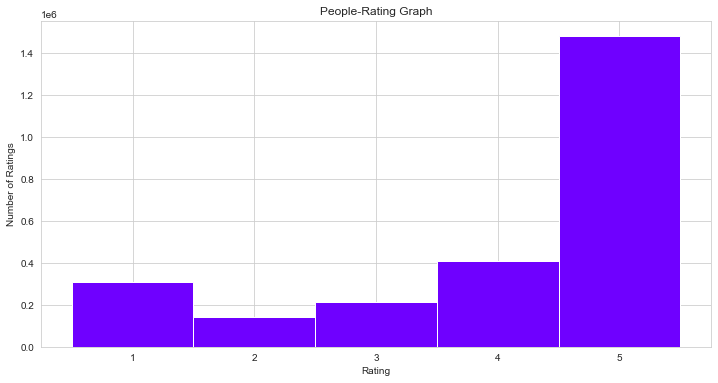

In [203]:
rating_histo_graph(df)

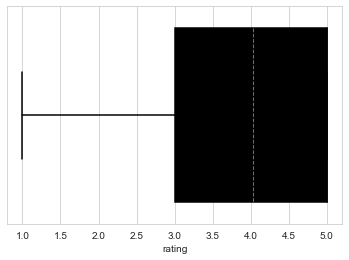

In [204]:
rating_boxplot(df)

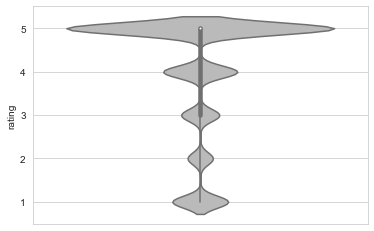

In [205]:
rating_violinplot(df)

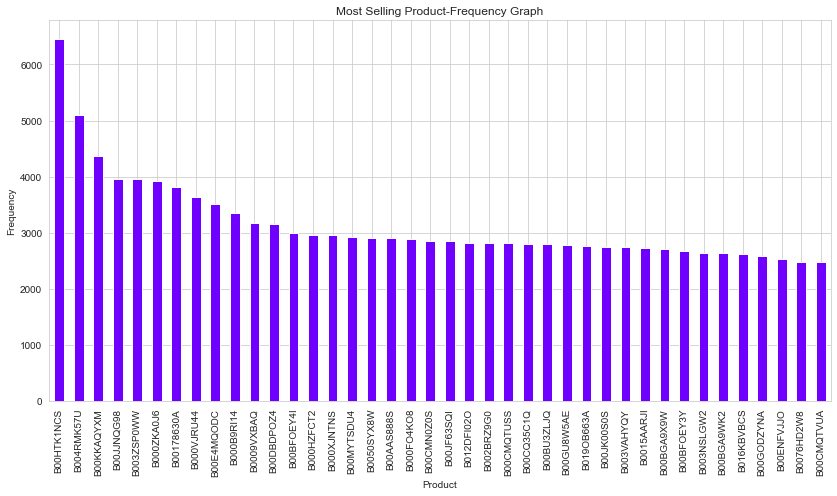

In [206]:
product_freq_graph_most_sold(df)

In [ ]:
product_freq_graph_least_sold(df)

,rating,verified
rating,1.000000,0.166468
verified,0.166468,1.000000


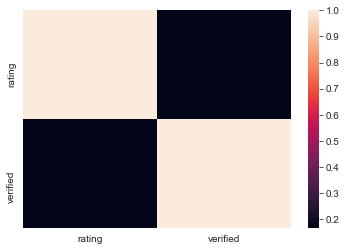

In [371]:
df_corr_heatmap(df)

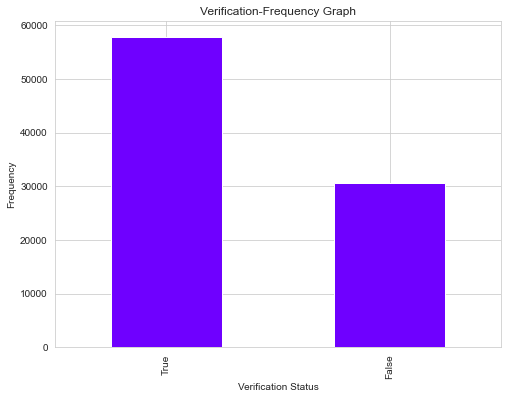

In [23]:
verified_reviews_graph(df)

In [209]:
df_verify = df.dropna()

In [210]:
df_verify.shape

(438475, 6)

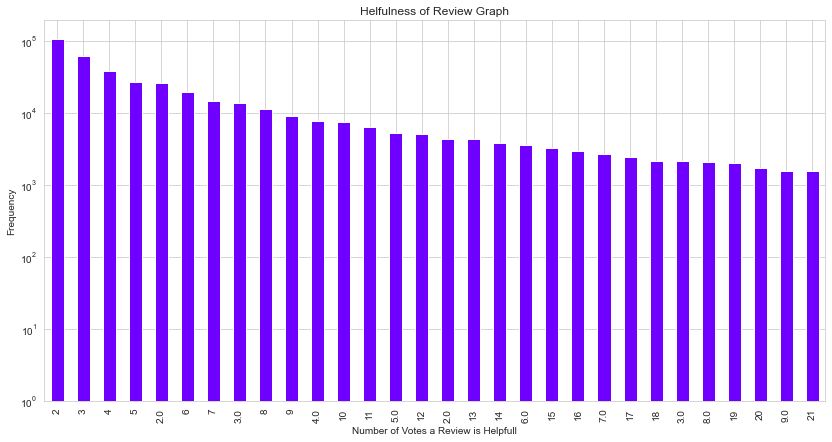

In [211]:
vote_helpfulness_graph(df)

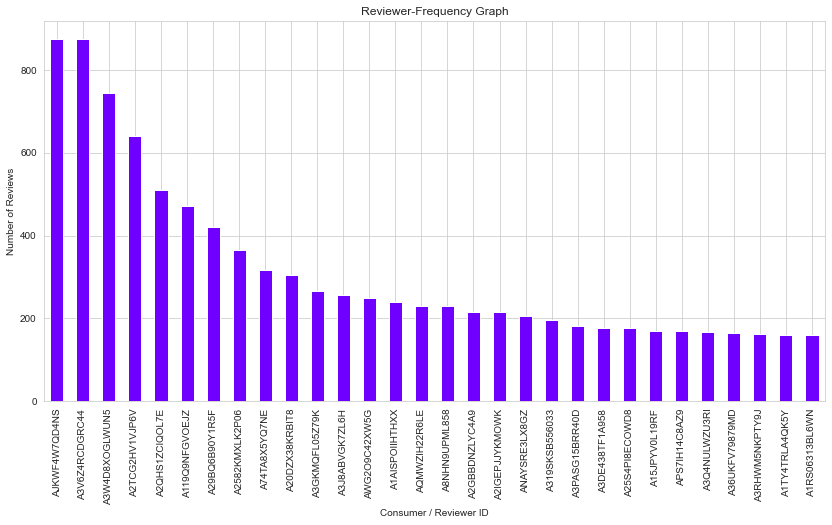

In [212]:
most_frequent_users_graph(df)

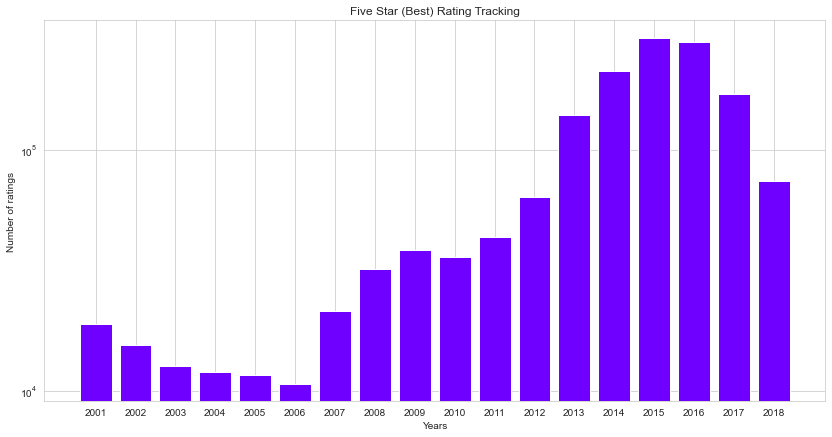

In [213]:
five_star_rating_graph()

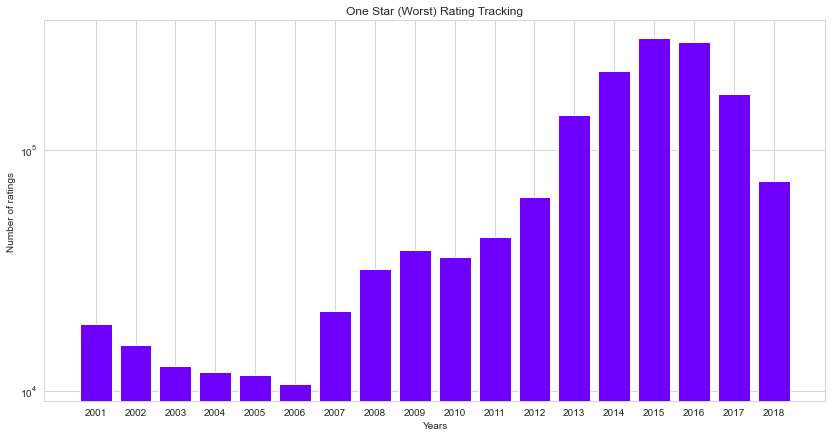

In [214]:
one_star_rating_graph()

# _Grocery and Gourmet Food_

In [215]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Grocery_and_Gourmet_Food.csv')

In [216]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,5,True,ALP49FBWT4I7V,1888861614,1370304000,NaN
1,4,True,A1KPIZOCLB9FZ8,1888861614,1400803200,NaN


In [217]:
rearrange_columns(df)

In [218]:
df.shape

(5061075, 6)

In [219]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,5,True,ALP49FBWT4I7V,1888861614,2013-06-04,NaN
1,4,True,A1KPIZOCLB9FZ8,1888861614,2014-05-23,NaN
2,4,True,A2W0FA06IYAYQE,1888861614,2014-05-09,NaN
3,5,True,A2PTZTCH2QUYBC,1888861614,2014-04-20,NaN
4,4,True,A2VNHGJ59N4Z90,1888861614,2014-04-16,NaN


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5061075 entries, 0 to 5061074
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   rating      int32         
 1   verified    bool          
 2   reviewerID  object        
 3   product_id  object        
 4   date        datetime64[ns]
 5   vote        object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 178.6+ MB


In [221]:
print(df.isnull().sum())

rating              0
verified            0
reviewerID          0
product_id          0
date                0
vote          4401897
dtype: int64


In [222]:
get_first_review_date(df)

Timestamp('2000-06-19 00:00:00')

In [223]:
get_last_review_date(df)

Timestamp('2018-10-07 00:00:00')

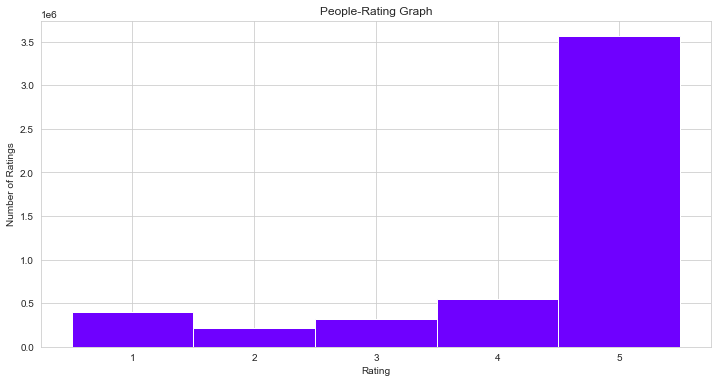

In [224]:
rating_histo_graph(df)

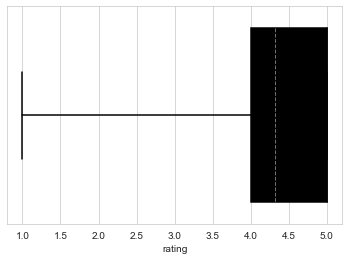

In [225]:
rating_boxplot(df)

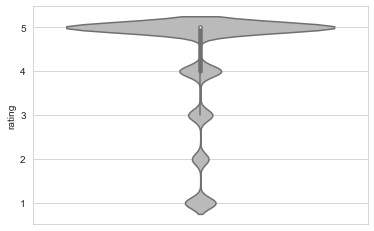

In [226]:
rating_violinplot(df)

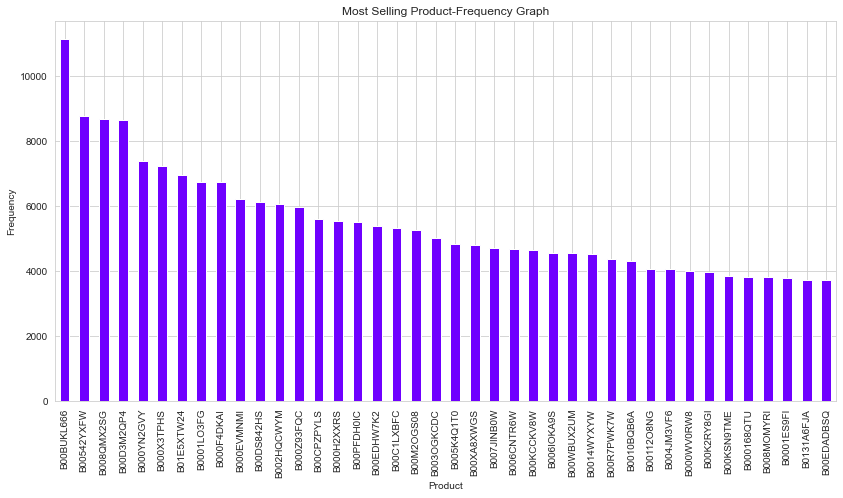

In [227]:
product_freq_graph_most_sold(df)

In [ ]:
product_freq_graph_least_sold(df)

,rating,verified
rating,1.000000,0.166468
verified,0.166468,1.000000


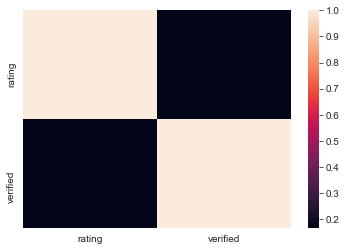

In [371]:
df_corr_heatmap(df)

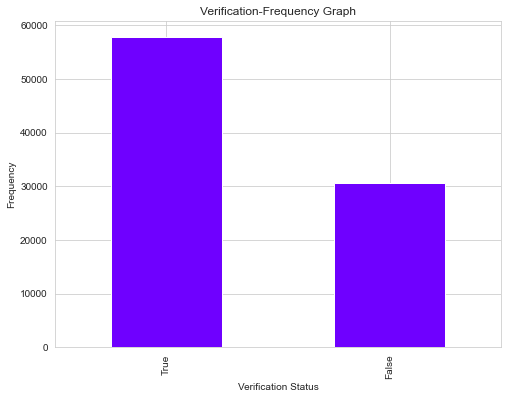

In [23]:
verified_reviews_graph(df)

In [230]:
df_verify = df.dropna()

In [231]:
df_verify.shape

(659178, 6)

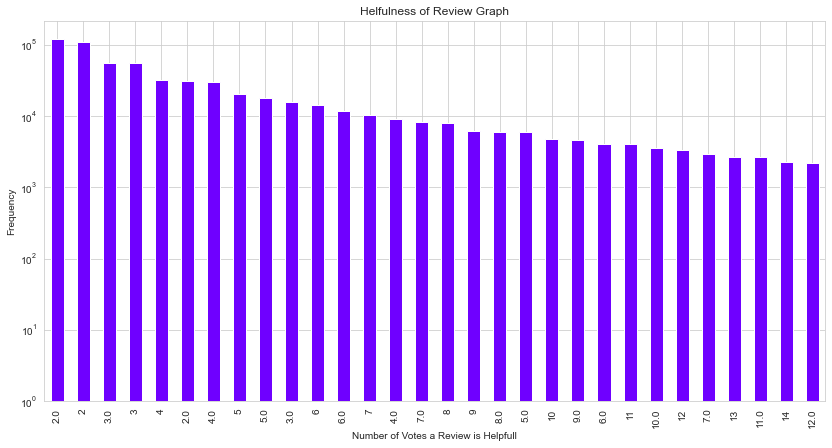

In [232]:
vote_helpfulness_graph(df)

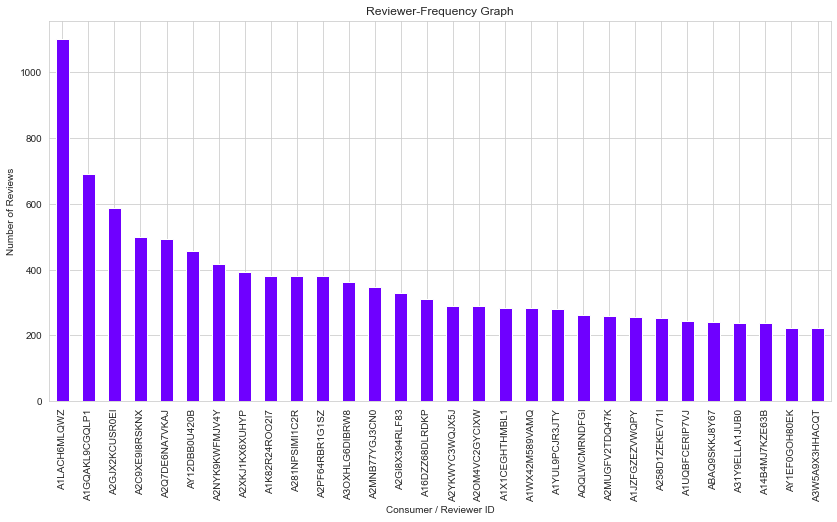

In [233]:
most_frequent_users_graph(df)

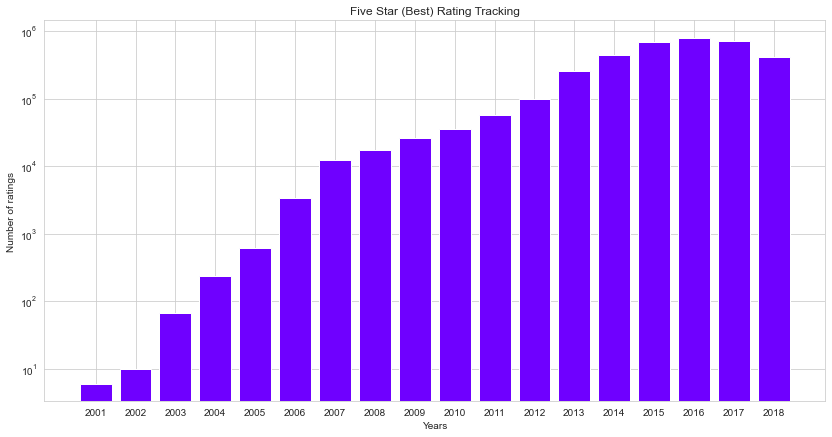

In [234]:
five_star_rating_graph()

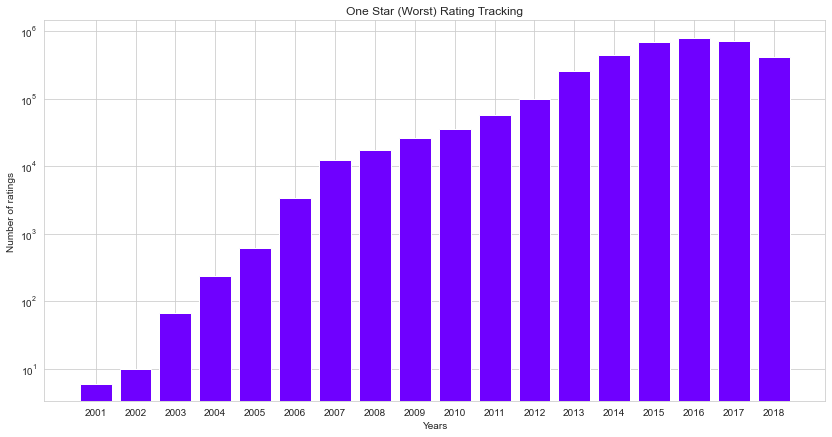

In [235]:
one_star_rating_graph()

# _Office Products_

In [236]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Office_Products.csv')

In [237]:
df.head(2)

,rating,vote,verified,reviewerID,product_id,date
0,3,6.0,False,A2WJLOXXIB7NF3,0140503528,1162512000
1,5,NaN,False,A1RKICUK0GG6VF,0140503528,1147132800


In [238]:
rearrange_columns(df)

In [239]:
df.shape

(5570778, 6)

In [240]:
df.head()

,rating,vote,verified,reviewerID,product_id,date
0,3,6.0,False,A2WJLOXXIB7NF3,0140503528,2006-11-03
1,5,NaN,False,A1RKICUK0GG6VF,0140503528,2006-05-09
2,5,NaN,False,A1QA5E50M398VW,0140503528,2006-03-11
3,5,12.0,False,A3N0HBW8IP8CZQ,0140503528,2001-01-24
4,5,65.0,False,A1K1JW1C5CUSUZ,0140503528,2000-07-30


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570778 entries, 0 to 5570777
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   rating      int32         
 1   vote        object        
 2   verified    bool          
 3   reviewerID  object        
 4   product_id  object        
 5   date        datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 196.6+ MB


In [242]:
print(df.isnull().sum())

rating              0
vote          4944365
verified            0
reviewerID          0
product_id          0
date                0
dtype: int64


In [243]:
get_first_review_date(df)

Timestamp('1998-05-08 00:00:00')

In [244]:
get_last_review_date(df)

Timestamp('2018-10-03 00:00:00')

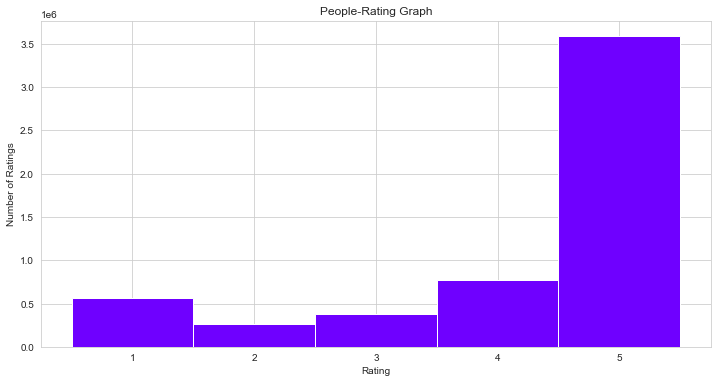

In [245]:
rating_histo_graph(df)

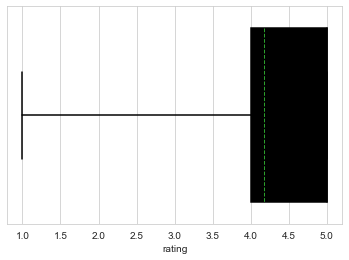

In [246]:
rating_boxplot(df)

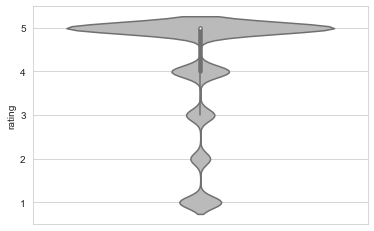

In [247]:
rating_violinplot(df)

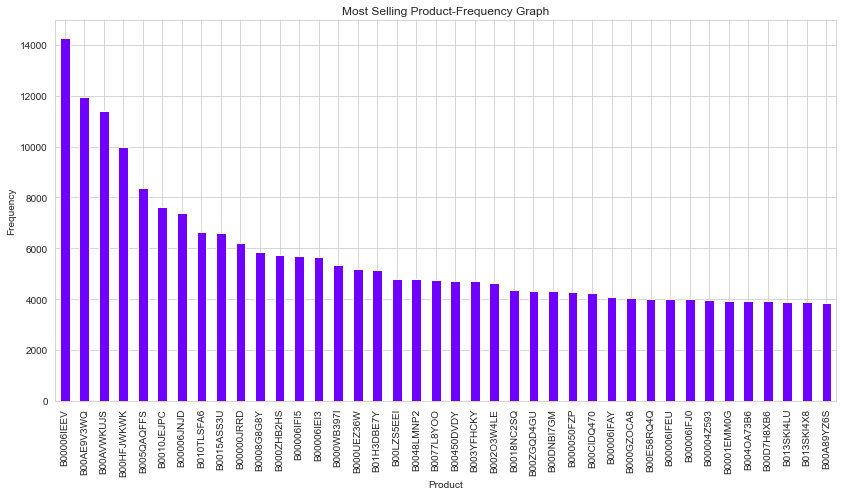

In [248]:
product_freq_graph_most_sold(df)

In [ ]:
product_freq_graph_least_sold(df)

,rating,verified
rating,1.000000,0.166468
verified,0.166468,1.000000


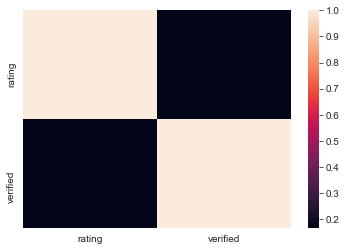

In [371]:
df_corr_heatmap(df)

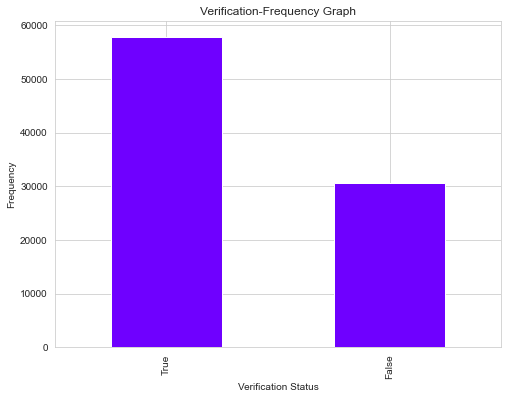

In [23]:
verified_reviews_graph(df)

In [251]:
df_verify = df.dropna()

In [252]:
df_verify.shape

(626413, 6)

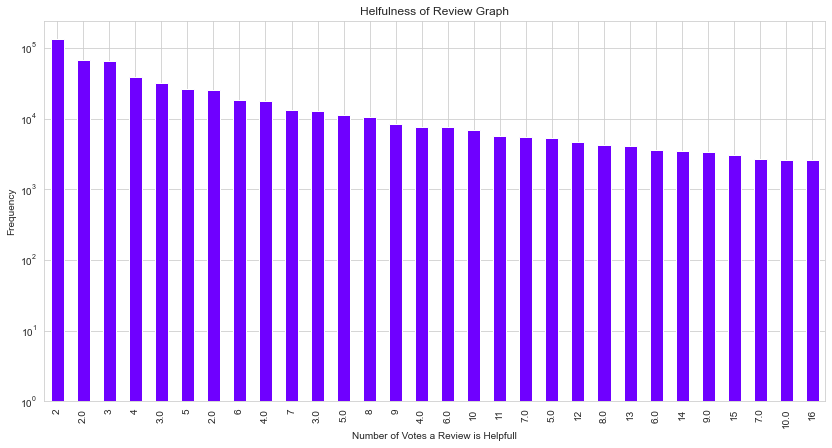

In [253]:
vote_helpfulness_graph(df)

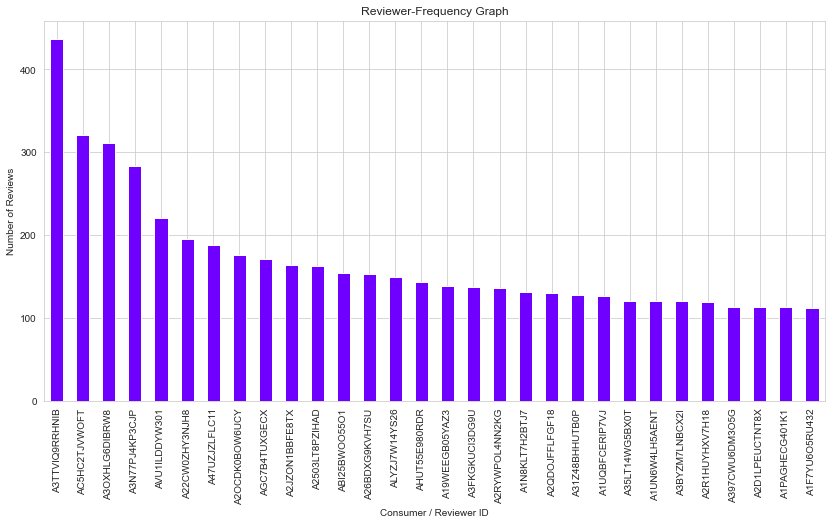

In [254]:
most_frequent_users_graph(df)

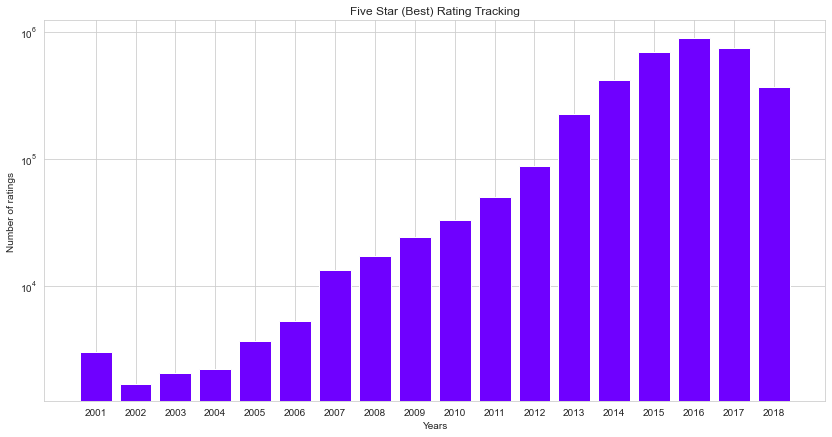

In [255]:
five_star_rating_graph()

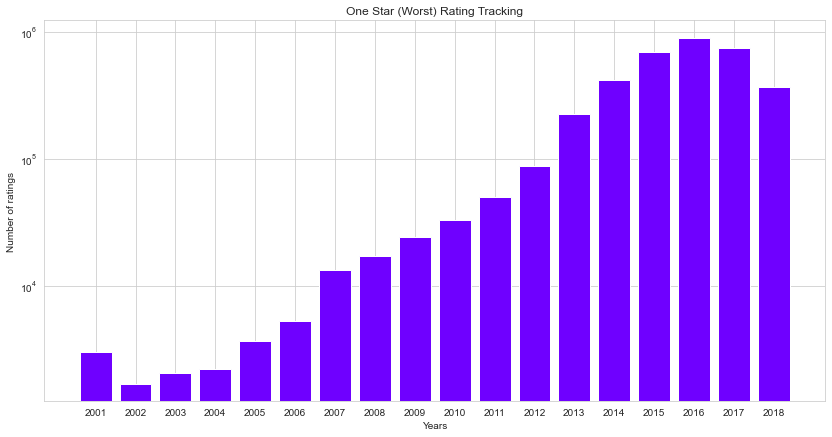

In [256]:
one_star_rating_graph()

# _Toys and Games_

In [257]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Toys_and_Games.csv')

In [258]:
df.head(2)

,rating,vote,verified,reviewerID,product_id,date
0,2,12,False,A1IDMI31WEANAF,0020232233,1474502400
1,1,21,False,A4BCEVVZ4Y3V3,0020232233,1474156800


In [259]:
rearrange_columns(df)

In [260]:
df.shape

(8191145, 6)

In [261]:
df.head()

,rating,vote,verified,reviewerID,product_id,date
0,2,12,False,A1IDMI31WEANAF,0020232233,2016-09-22
1,1,21,False,A4BCEVVZ4Y3V3,0020232233,2016-09-18
2,3,19,True,A2EZ9PY1IHHBX0,0020232233,2016-09-12
3,5,NaN,True,A139PXTTC2LGHZ,0020232233,2017-03-02
4,1,3,True,A3IB33V29XIL8O,0020232233,2017-02-08


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191145 entries, 0 to 8191144
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   rating      int32         
 1   vote        object        
 2   verified    bool          
 3   reviewerID  object        
 4   product_id  object        
 5   date        datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 289.0+ MB


In [263]:
print(df.isnull().sum())

rating              0
vote          7229643
verified            0
reviewerID          0
product_id          0
date                0
dtype: int64


In [264]:
get_first_review_date(df)

Timestamp('1999-10-06 00:00:00')

In [265]:
get_last_review_date(df)

Timestamp('2018-10-05 00:00:00')

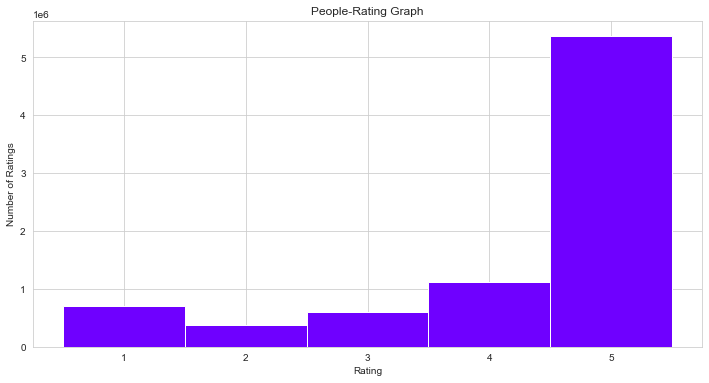

In [266]:
rating_histo_graph(df)

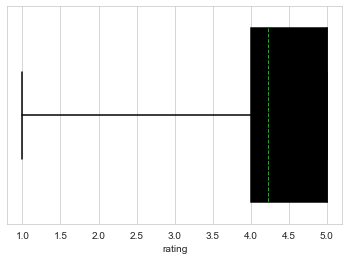

In [267]:
rating_boxplot(df)

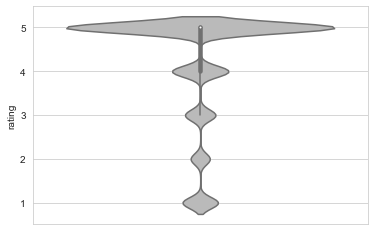

In [268]:
rating_violinplot(df)

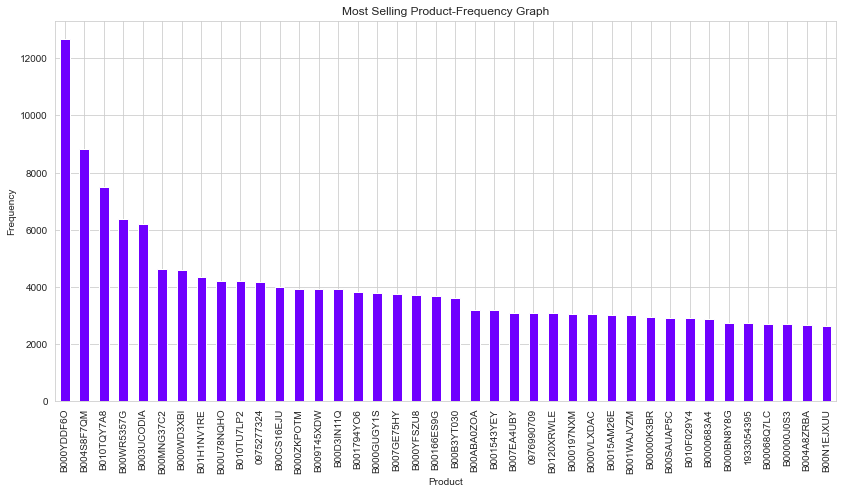

In [269]:
product_freq_graph_most_sold(df)

In [ ]:
product_freq_graph_least_sold(df)

,rating,verified
rating,1.000000,0.166468
verified,0.166468,1.000000


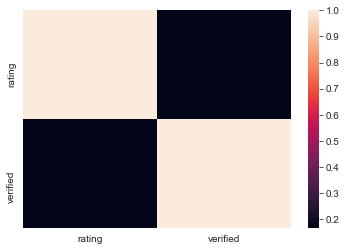

In [371]:
df_corr_heatmap(df)

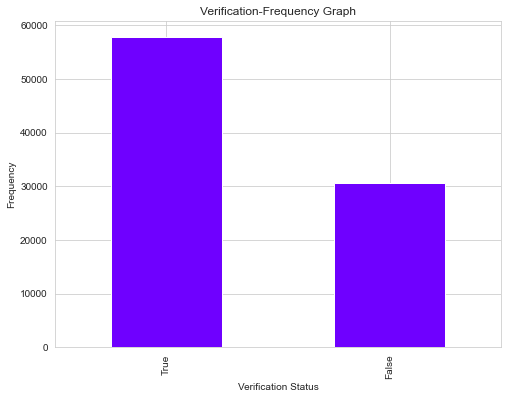

In [23]:
verified_reviews_graph(df)

In [272]:
df_verify = df.dropna()

In [273]:
df_verify.shape

(961502, 6)

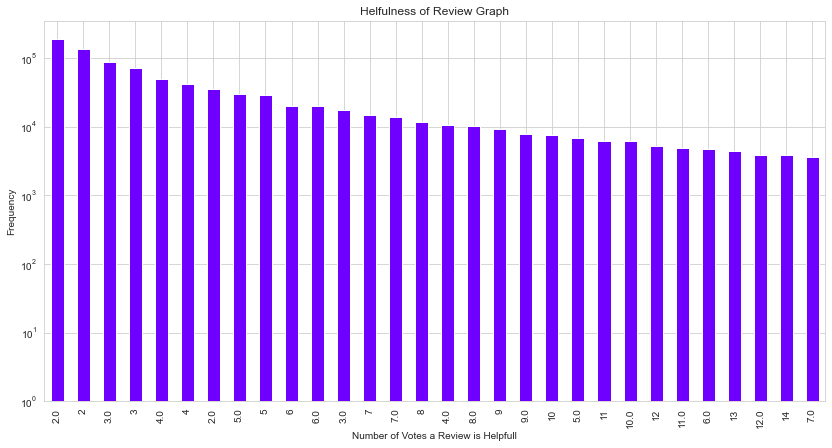

In [274]:
vote_helpfulness_graph(df)

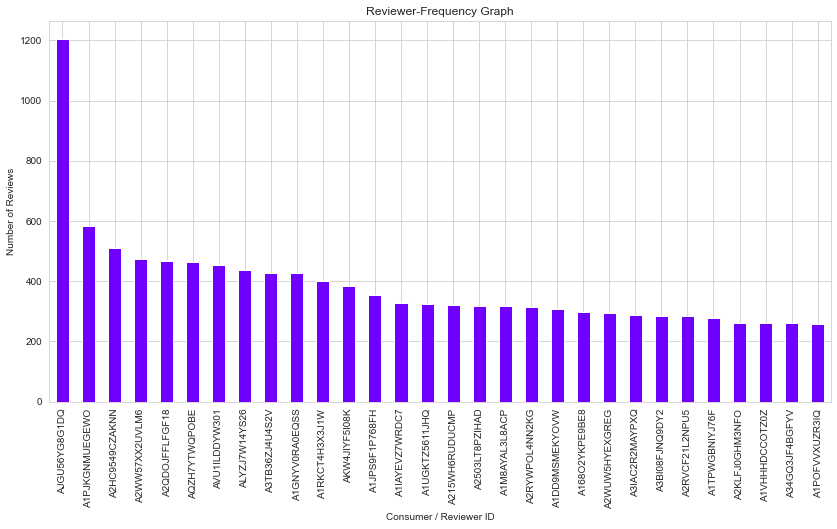

In [275]:
most_frequent_users_graph(df)

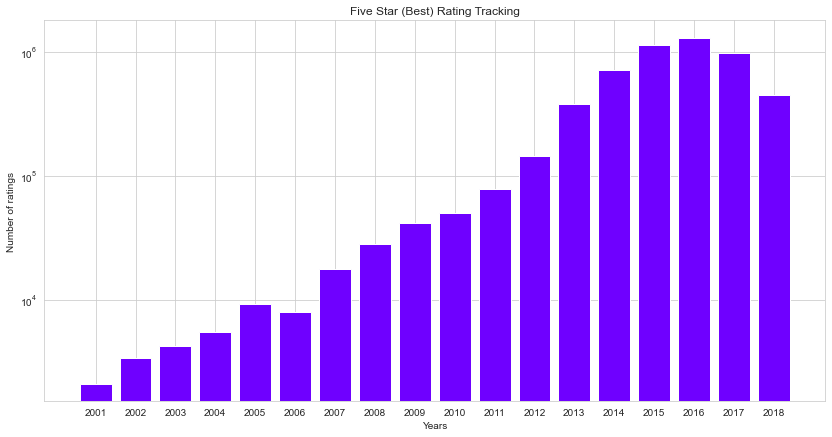

In [276]:
five_star_rating_graph()

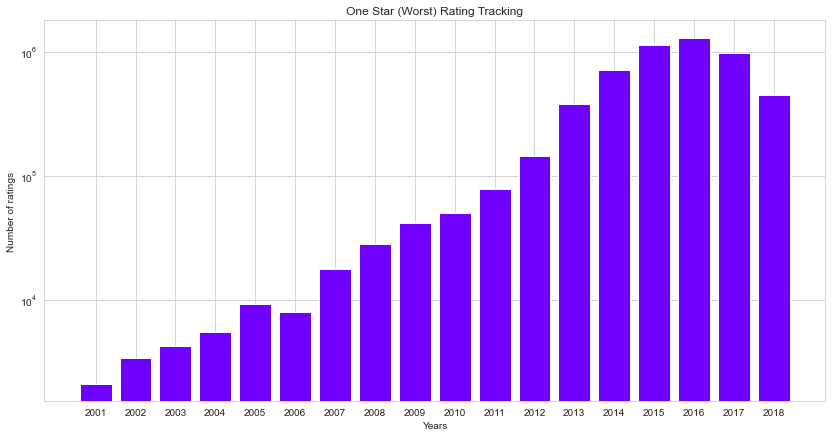

In [277]:
one_star_rating_graph()

# _Cell Phones and Accessories_

In [278]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Cell_Phones_and_Accessories.csv')

In [279]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,5,False,A1GG51FWU0XQYH,098949232X,1416355200,NaN
1,5,False,AVFIDS9RK38E0,098949232X,1416355200,NaN


In [280]:
rearrange_columns(df)

In [281]:
df.shape

(10039627, 6)

In [282]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,5,False,A1GG51FWU0XQYH,098949232X,2014-11-19,NaN
1,5,False,AVFIDS9RK38E0,098949232X,2014-11-19,NaN
2,5,False,A2S4AVR5SJ7KMI,098949232X,2014-11-19,NaN
3,5,False,AEMMMVOR9BFLI,098949232X,2014-11-19,NaN
4,5,False,A2DZXMBTY7KLYP,098949232X,2014-11-19,NaN


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10039627 entries, 0 to 10039626
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   rating      int32         
 1   verified    bool          
 2   reviewerID  object        
 3   product_id  object        
 4   date        datetime64[ns]
 5   vote        object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 354.3+ MB


In [284]:
print(df.isnull().sum())

rating              0
verified            0
reviewerID          0
product_id          0
date                0
vote          9353081
dtype: int64


In [285]:
get_first_review_date(df)

Timestamp('1999-10-31 00:00:00')

In [286]:
get_last_review_date(df)

Timestamp('2018-10-05 00:00:00')

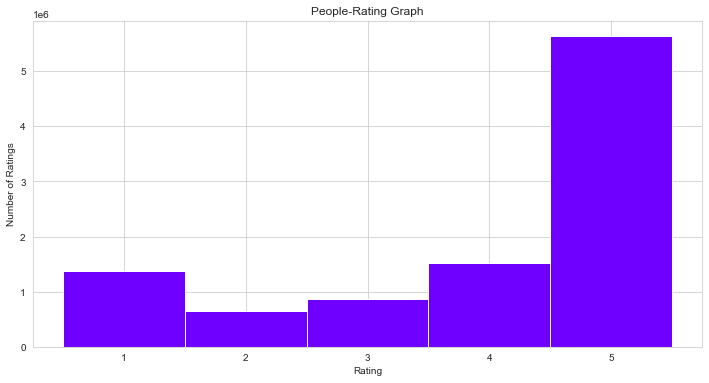

In [287]:
rating_histo_graph(df)

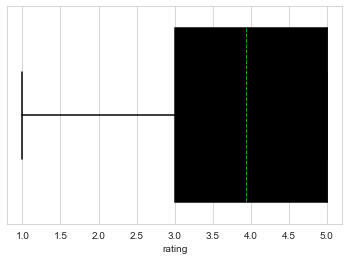

In [288]:
rating_boxplot(df)

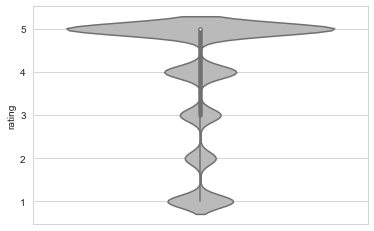

In [289]:
rating_violinplot(df)

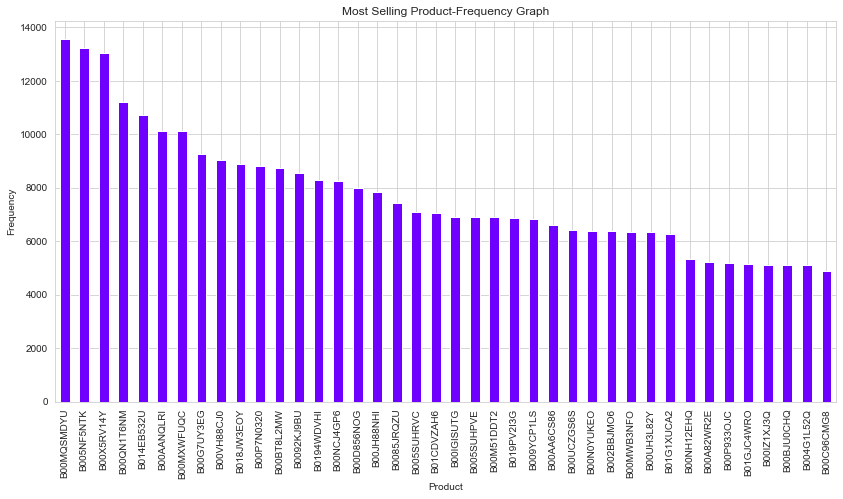

In [290]:
product_freq_graph_most_sold(df)

In [ ]:
product_freq_graph_least_sold(df)

,rating,verified
rating,1.000000,0.166468
verified,0.166468,1.000000


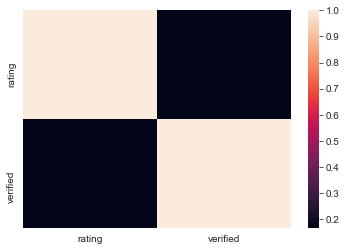

In [371]:
df_corr_heatmap(df)

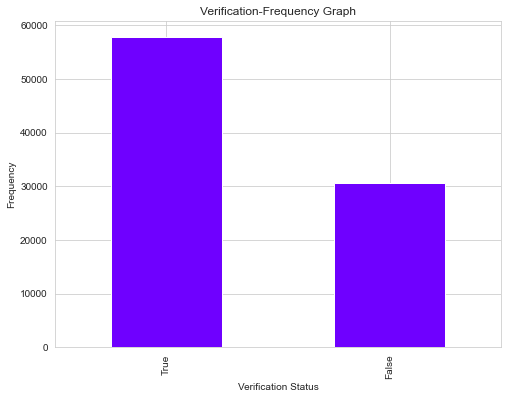

In [23]:
verified_reviews_graph(df)

In [293]:
df_verify = df.dropna()

In [294]:
df_verify.shape

(686546, 6)

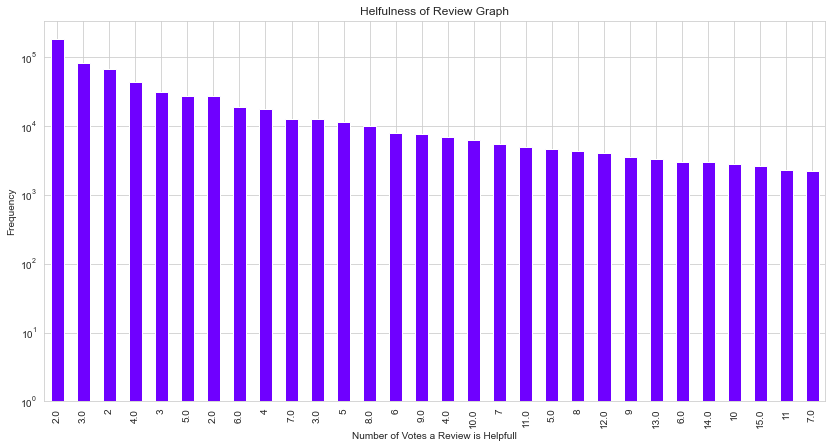

In [295]:
vote_helpfulness_graph(df)

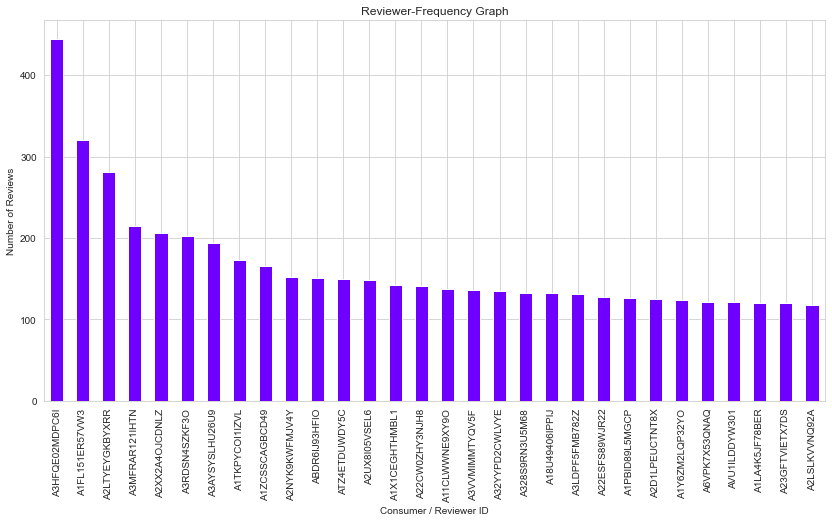

In [296]:
most_frequent_users_graph(df)

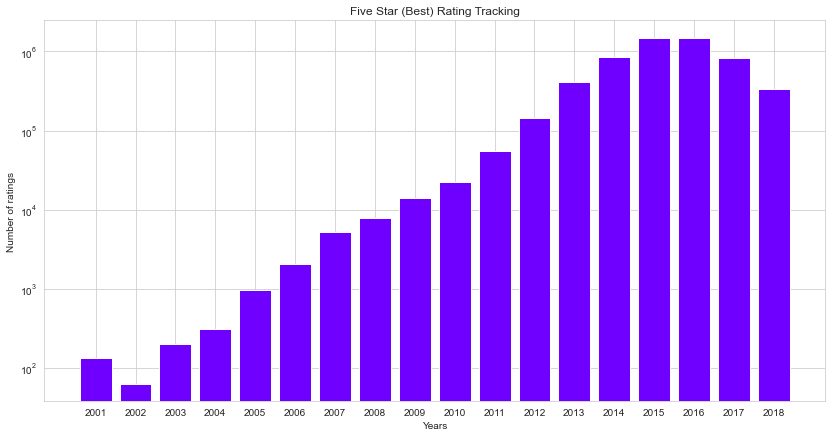

In [297]:
five_star_rating_graph()

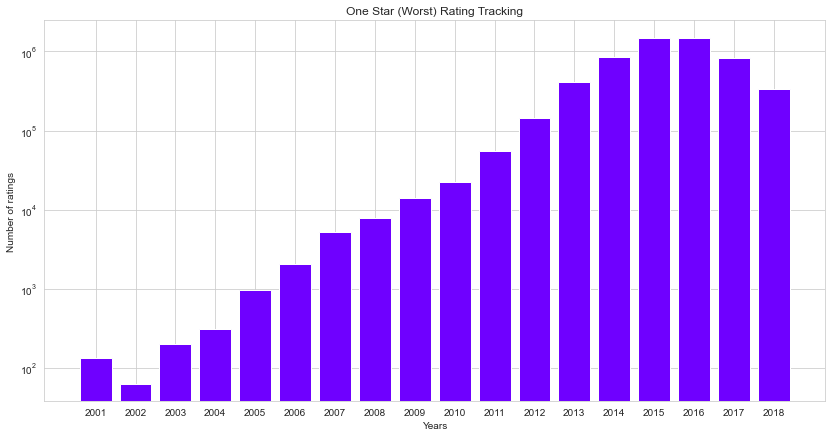

In [298]:
one_star_rating_graph()

# _Sports and Outdoors_

In [299]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Sports_and_Outdoors.csv')

In [300]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,5,False,A23K73OVXJ04EG,0000031895,1391212800,NaN
1,4,True,A2681T699HV6H1,0000031895,1384905600,NaN


In [301]:
rearrange_columns(df)

In [302]:
df.shape

(12969732, 6)

In [303]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,5,False,A23K73OVXJ04EG,0000031895,2014-02-01,NaN
1,4,True,A2681T699HV6H1,0000031895,2013-11-20,NaN
2,1,True,A374PA18DCGS5Y,0000031895,2016-10-21,NaN
3,5,True,A14PVW2N5YBWSA,0000031895,2016-10-18,NaN
4,1,True,A2KWBC44QI2567,0000031895,2016-10-17,NaN


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12969732 entries, 0 to 12969731
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   rating      int32         
 1   verified    bool          
 2   reviewerID  object        
 3   product_id  object        
 4   date        datetime64[ns]
 5   vote        object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 457.6+ MB


In [305]:
print(df.isnull().sum())

rating               0
verified             0
reviewerID           0
product_id           0
date                 0
vote          11378765
dtype: int64


In [306]:
get_first_review_date(df)

Timestamp('1999-05-08 00:00:00')

In [307]:
get_last_review_date(df)

Timestamp('2018-10-05 00:00:00')

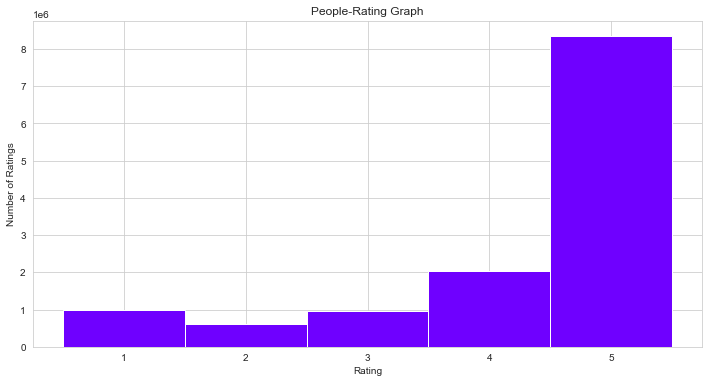

In [308]:
rating_histo_graph(df)

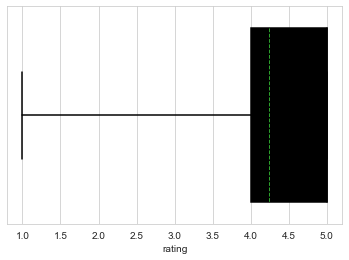

In [309]:
rating_boxplot(df)

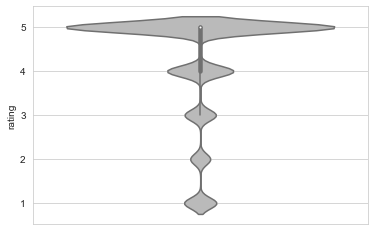

In [310]:
rating_violinplot(df)

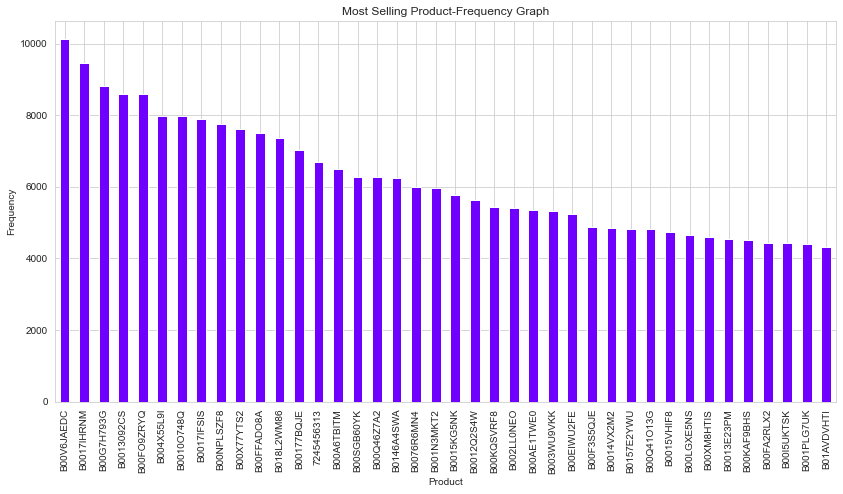

In [311]:
product_freq_graph_most_sold(df)

In [ ]:
product_freq_graph_least_sold(df)

,rating,verified
rating,1.000000,0.166468
verified,0.166468,1.000000


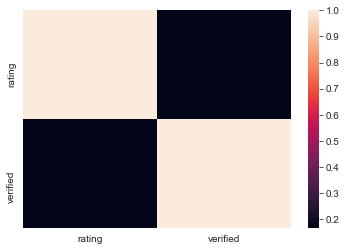

In [371]:
df_corr_heatmap(df)

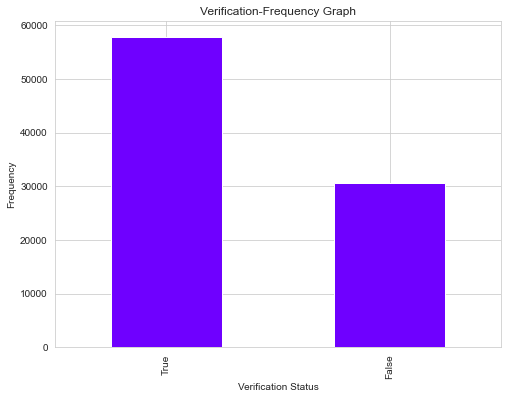

In [23]:
verified_reviews_graph(df)

In [314]:
df_verify = df.dropna()

In [315]:
df_verify.shape

(1590967, 6)

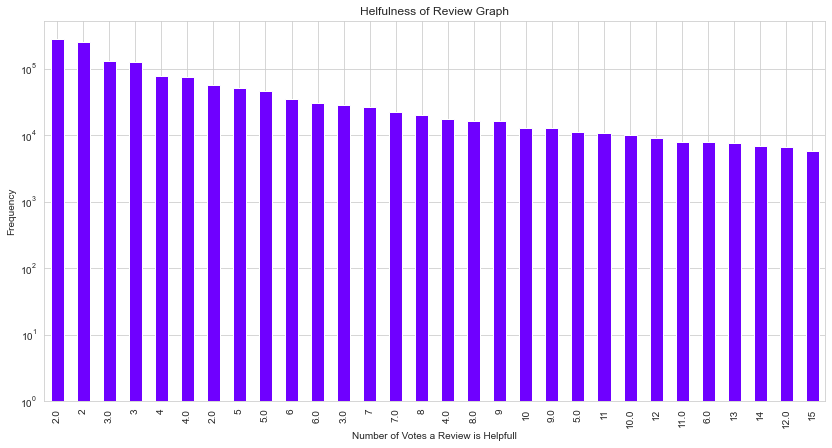

In [316]:
vote_helpfulness_graph(df)

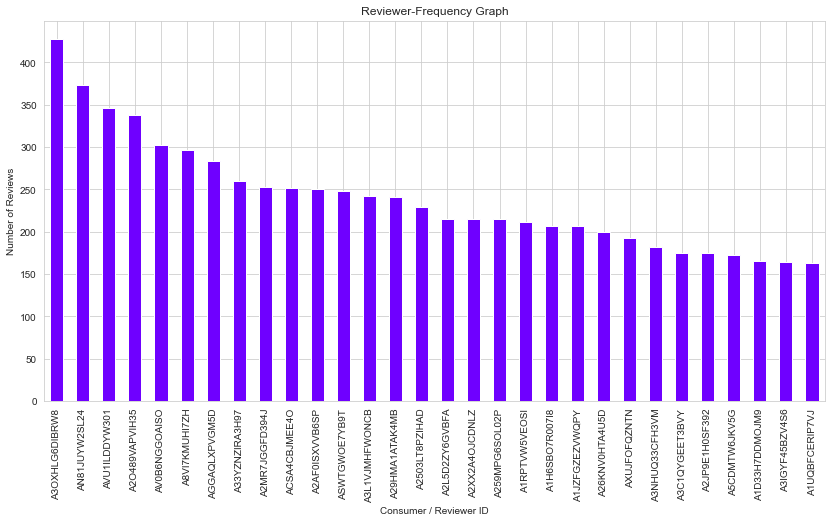

In [317]:
most_frequent_users_graph(df)

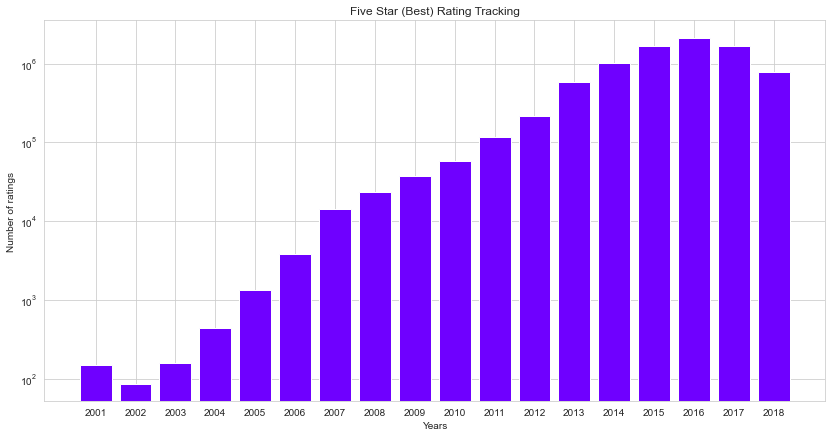

In [318]:
five_star_rating_graph()

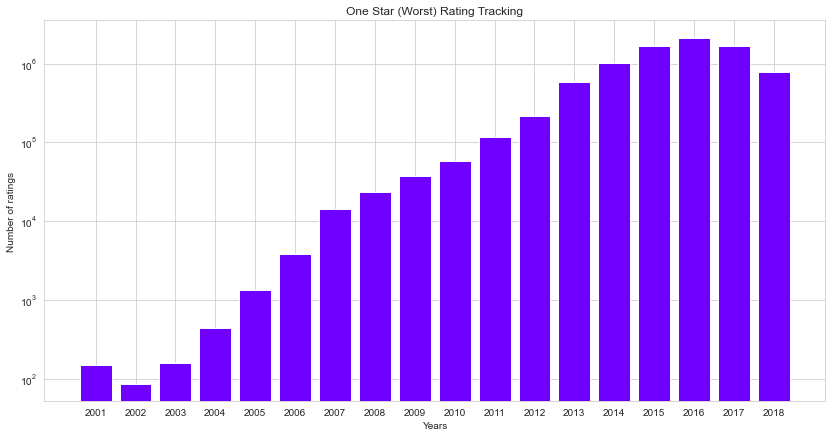

In [319]:
one_star_rating_graph()